In [91]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import boto3
from botocore.client import Config
import os
import pandas as pd
from io import StringIO
import matplotlib.dates as dates
from datetime import datetime
import matplotlib.ticker as ticker
from random import shuffle
from time import time
from pandas.plotting import register_matplotlib_converters
%matplotlib notebook

os.chdir('C:\\Users\\A Sua\\Documents\\AWS\\credentials')
list_of_lines = []
with open('capstoner_key.txt') as fp:
    lines = fp.readlines()
    for line in lines:
        line = line.strip()
        list_of_lines.append(line)
    fp.close()


location = list_of_lines[0].split('=')[1]
AWS_ACCESS_KEY_ID = list_of_lines[1].split('=')[1]
AWS_SECRET_ACCESS_KEY = list_of_lines[2].split('=')[1]
os.chdir('C:\\Users\\A Sua\\Documents\\FIU\\CAP2020')
%matplotlib notebook

### import returns

In [3]:
### BUCKETS & KEYS
BUCKET_NAME = 'capstonefiu2020-data'
key_location = 'data/processed'
file_name = 'df_returns07_18.csv'
key_path = key_location + '/' + file_name

### ACTIVATE CLIENT
client = boto3.client('s3', 
              aws_access_key_id = AWS_ACCESS_KEY_ID,
               aws_secret_access_key=AWS_SECRET_ACCESS_KEY)


### INSTANTIATE DATAFRAME
csv_obj = client.get_object(Bucket = BUCKET_NAME, Key=key_path)
body = csv_obj['Body']
csv_string = body.read().decode('utf-8')

df_returns = pd.read_csv(StringIO(csv_string))
df_returns.index = df_returns['Unnamed: 0']
df_returns = df_returns.drop('Unnamed: 0', axis=1)
df_returns.index.names = ['date']


#df_bidlo.head()
#### TRANSPOSE DATA FOR EASE OF USE
df_returns = df_returns.T
df_returns.index = pd.to_datetime(df_returns.index)
print(df_returns.shape)
df_returns.head()

(3020, 388)


date        ORCL_ORACLE CORP  MSFT_MICROSOFT CORP  \
2007-01-03          0.021587             0.000000   
2007-01-04          0.009709            -0.001675   
2007-01-05         -0.002262            -0.005703   
2007-01-08          0.012472             0.009784   
2007-01-09         -0.002240             0.001002   

date        TROW_T ROWE PRICE GROUP INC  HON_HONEYWELL INTERNATIONAL INC  \
2007-01-03                     0.045236                        -0.003095   
2007-01-04                     0.008743                        -0.000443   
2007-01-05                    -0.001950                        -0.009539   
2007-01-08                     0.018237                         0.006047   
2007-01-09                     0.004051                         0.007124   

date        ADM_ARCHER DANIELS MIDLAND CO  FISV_FISERV INC  CERN_CERNER CORP  \
2007-01-03                       0.003129        -0.016215         -0.006593   
2007-01-04                      -0.005615         0.021136          0.028761   
2007-01-05                      -0.001568        -0.003798         -0.022366   
2007-01-08                       0.005027         0.002478         -0.003520   
2007-01-09                      -0.024383         0.003042          0.000883   

date        KO_COCA COLA CO  CDNS_CADENCE DESIGN SYSTEMS INC  \
2007-01-03         0.006839                         0.013400   
2007-01-04         0.000412                        -0.007162   
2007-01-05        -0.006996                         0.002220   
2007-01-08         0.006424                        -0.001661   
2007-01-09         0.000824                         0.005546   

date        ED_CONSOLIDATED EDISON INC  ...  ROST_ROSS STORES INC  \
2007-01-03                    0.006657  ...              0.040614   
2007-01-04                   -0.001653  ...              0.023614   
2007-01-05                   -0.014076  ...              0.006408   
2007-01-08                   -0.001470  ...              0.005731   
2007-01-09                    0.002944  ...              0.012346   

date        IPGP_I P G PHOTONICS CORP  UNH_UNITED HEALTHCARE  \
2007-01-03                   0.003750              -0.021589   
2007-01-04                   0.000000               0.006468   
2007-01-05                   0.030303              -0.006804   
2007-01-08                  -0.006446               0.014653   
2007-01-09                   0.042174              -0.012003   

date        UA_UNDER ARMOUR INC  MKC_MCCORMICK & CO INC  LEN_LENNAR CORP  \
2007-01-03            -0.017839               -0.004149        -0.034884   
2007-01-04            -0.006458               -0.004688        -0.010666   
2007-01-05            -0.017672               -0.003150        -0.008585   
2007-01-08             0.013027               -0.002369        -0.017699   
2007-01-09            -0.002450                0.003430         0.006153   

date        TAP_MOLSON COORS BREWING CO  STZ_CONSTELLATION BRANDS INC  \
2007-01-03                     0.020670                      0.002408   
2007-01-04                    -0.005844                     -0.114437   
2007-01-05                    -0.007185                     -0.029423   
2007-01-08                     0.009677                      0.014021   
2007-01-09                    -0.000395                      0.005693   

date        CBS_CBS CORP  CMG_CHIPOTLE MEXICAN GRILL INC  
2007-01-03      0.013470                        0.013462  
2007-01-04     -0.008544                       -0.018259  
2007-01-05     -0.012144                       -0.006862  
2007-01-08      0.005180                        0.019091  
2007-01-09     -0.004510                        0.014644  

[5 rows x 388 columns]

In [31]:
np.sqrt(3020)

54.954526656136345

### What is the distribution of the sigmas?

In [82]:
sigmas = []
for symbol in df_returns.columns:
    temp_sigma = round(df_returns[symbol].describe()['std'])
    sigmas.append(temp_sigma)
sigmas = pd.Series(sigmas)
sigmas
### not a super useful visuzlization

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
383    0.0
384    0.0
385    0.0
386    0.0
387    0.0
Length: 388, dtype: float64

### Distribution of Wost Returns?

### Worst Dates

In [88]:
worst_dates_dow = pd.to_datetime(['2008-10-15', '2008-12-1', '2008-10-9', '2008-9-29', '2011-8-8'])
#worst_dates_sp = 
worst_dates_dow

DatetimeIndex(['2008-10-15', '2008-12-01', '2008-10-09', '2008-09-29',
               '2011-08-08'],
              dtype='datetime64[ns]', freq=None)

### Distribution of Returns of Worst systemic dates?

### Title: Company, Z-score of worst day, variance of returns

#### worst return & date

In [80]:
# ### z score of worst return
# worst_z_score1 = round((df_returns['UA_UNDER ARMOUR INC'].sort_values()[0] - df_returns['UA_UNDER ARMOUR INC'].describe()['mean'])/df_returns['UA_UNDER ARMOUR INC'].describe()['std'], 4)
# worst_z_score2 = round((df_returns['UA_UNDER ARMOUR INC'].sort_values()[1] - df_returns['UA_UNDER ARMOUR INC'].describe()['mean'])/df_returns['UA_UNDER ARMOUR INC'].describe()['std'], 4)
# worst_z_score3 = round((df_returns['UA_UNDER ARMOUR INC'].sort_values()[2] - df_returns['UA_UNDER ARMOUR INC'].describe()['mean'])/df_returns['UA_UNDER ARMOUR INC'].describe()['std'], 4)

# sigma = round(df_returns['UA_UNDER ARMOUR INC'].describe()['std'], 4)

In [79]:
# fig, ax = plt.subplots(1,1, figsize=(5,5))

# ax.hist(df_returns['UA_UNDER ARMOUR INC'], bins=50)
# ax.set_title('UA_UNDER ARMOUR INC\nWorst:{}\nVar:{}'.format(worst_z_score, sigma))
# ax.set_xlim([-0.45, 0.45])
# plt.show()

#### lets genrate the distribution of the worst z-scores

In [43]:
worst_z_scores = []
for symbol in df_returns.columns:
    z1= round((df_returns[symbol].sort_values()[0] - df_returns[symbol].describe()['mean'])/df_returns[symbol].describe()['std'], 4)    
    z2= round((df_returns[symbol].sort_values()[1] - df_returns[symbol].describe()['mean'])/df_returns[symbol].describe()['std'], 4)    
    z3= round((df_returns[symbol].sort_values()[2] - df_returns[symbol].describe()['mean'])/df_returns[symbol].describe()['std'], 4)
    z4= round((df_returns[symbol].sort_values()[3] - df_returns[symbol].describe()['mean'])/df_returns[symbol].describe()['std'], 4)    
    z5= round((df_returns[symbol].sort_values()[4] - df_returns[symbol].describe()['mean'])/df_returns[symbol].describe()['std'], 4)    
    
    temp_mean = np.mean([z1, z2, z3, z4, z5])
    
    worst_z_scores.append(temp_mean)
    
worst_z_scores = pd.Series(worst_z_scores, index=df_returns.columns)
worst_z_scores

date
ORCL_ORACLE CORP                  -5.73810
MSFT_MICROSOFT CORP               -5.74460
TROW_T ROWE PRICE GROUP INC       -6.37202
HON_HONEYWELL INTERNATIONAL INC   -5.27930
ADM_ARCHER DANIELS MIDLAND CO     -6.68722
                                    ...   
LEN_LENNAR CORP                   -5.49828
TAP_MOLSON COORS BREWING CO       -5.15062
STZ_CONSTELLATION BRANDS INC      -6.76622
CBS_CBS CORP                      -6.65996
CMG_CHIPOTLE MEXICAN GRILL INC    -7.16208
Length: 388, dtype: float64

In [44]:
worst_z_scores.describe()

count    388.000000
mean      -6.252714
std        1.002483
min      -11.132800
25%       -6.824990
50%       -6.137930
75%       -5.498520
max       -4.073940
dtype: float64

### we could also color code by median returns









Batch 0


<IPython.core.display.Javascript object>


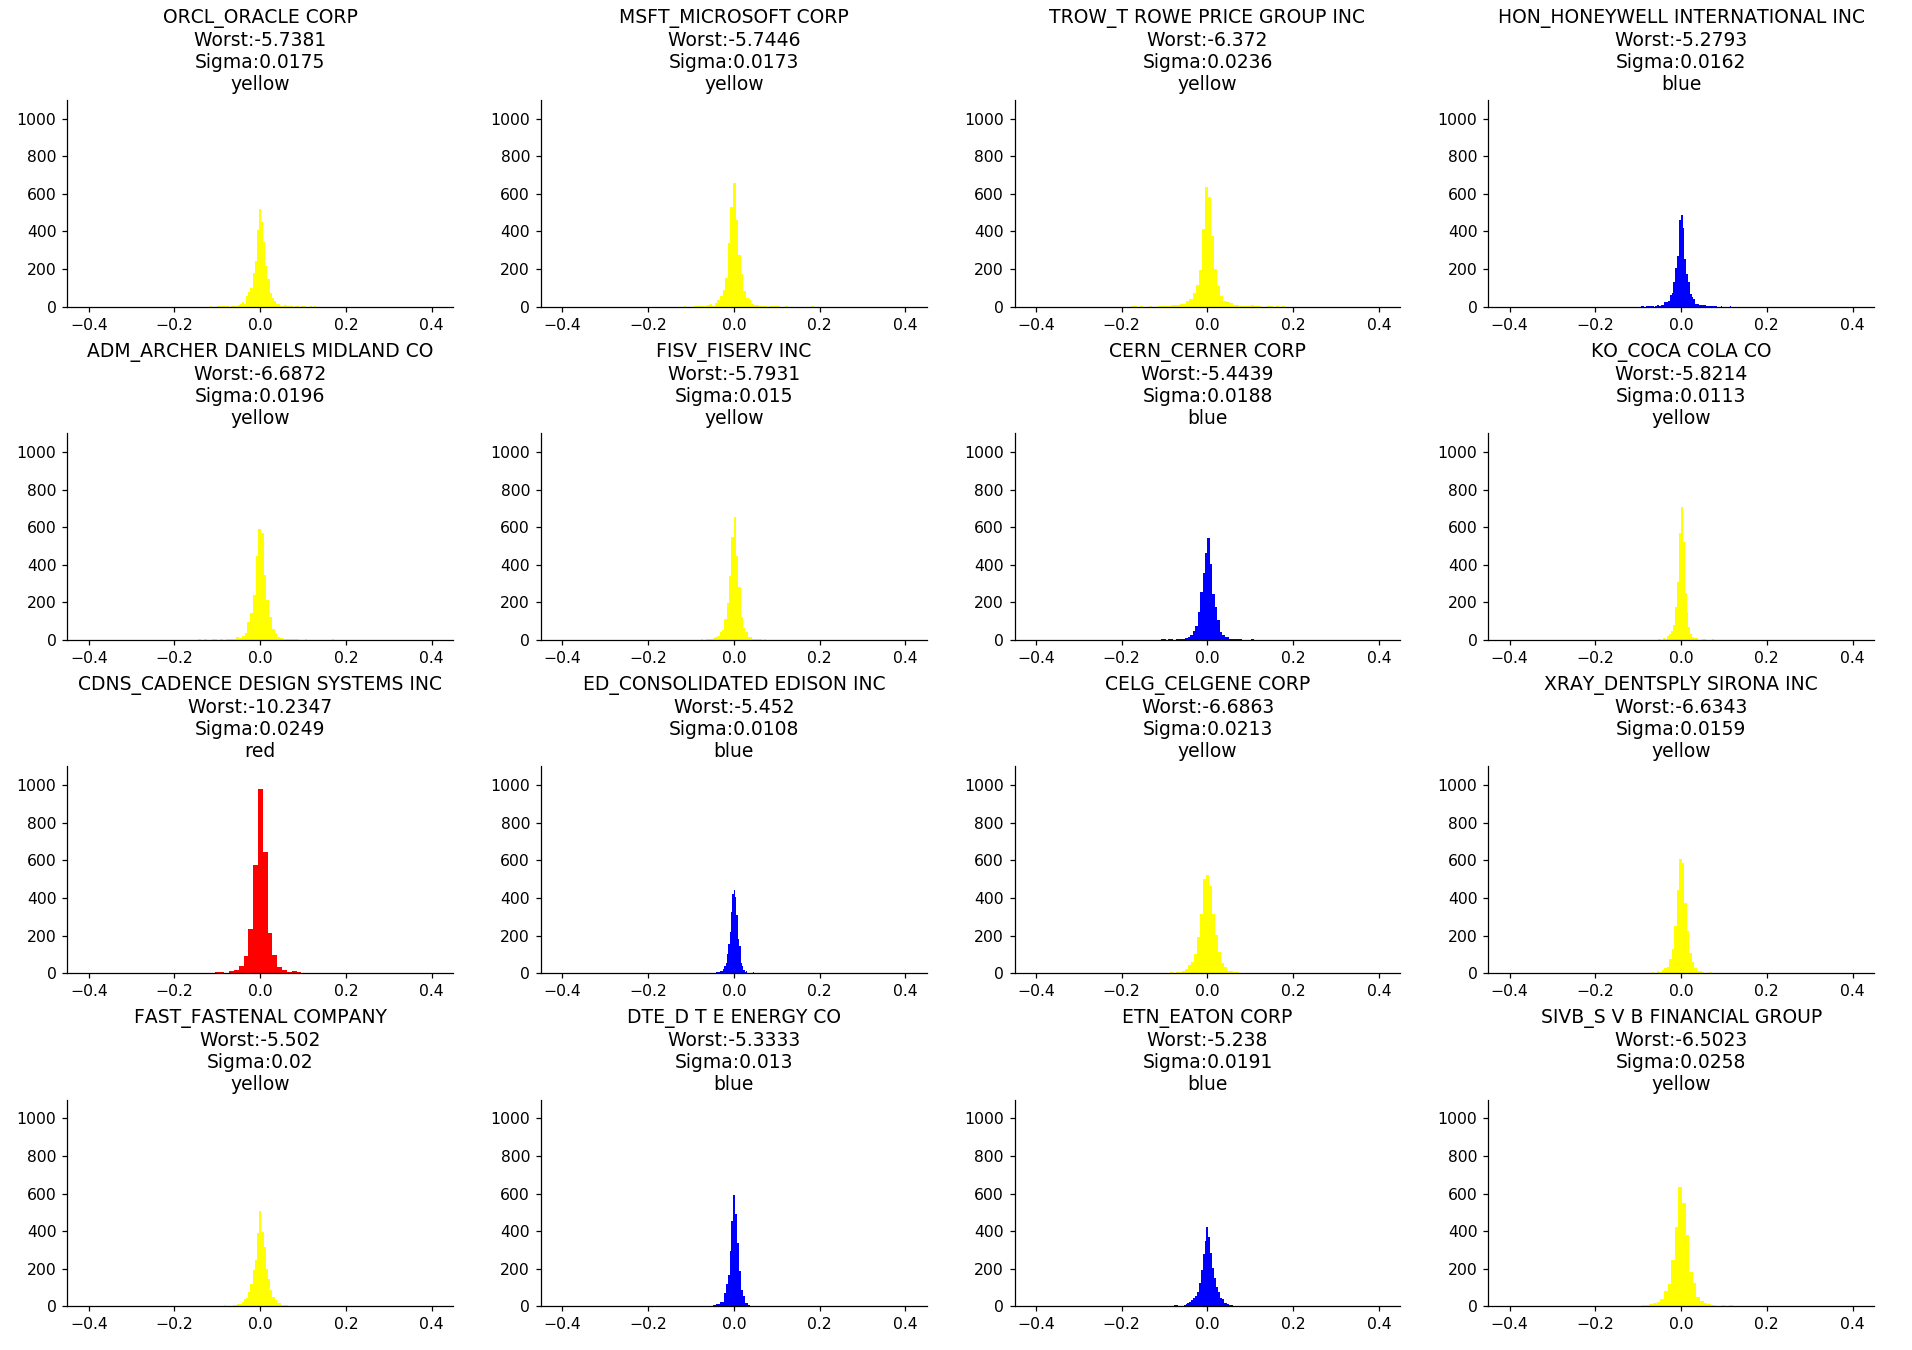









Batch 1


<IPython.core.display.Javascript object>


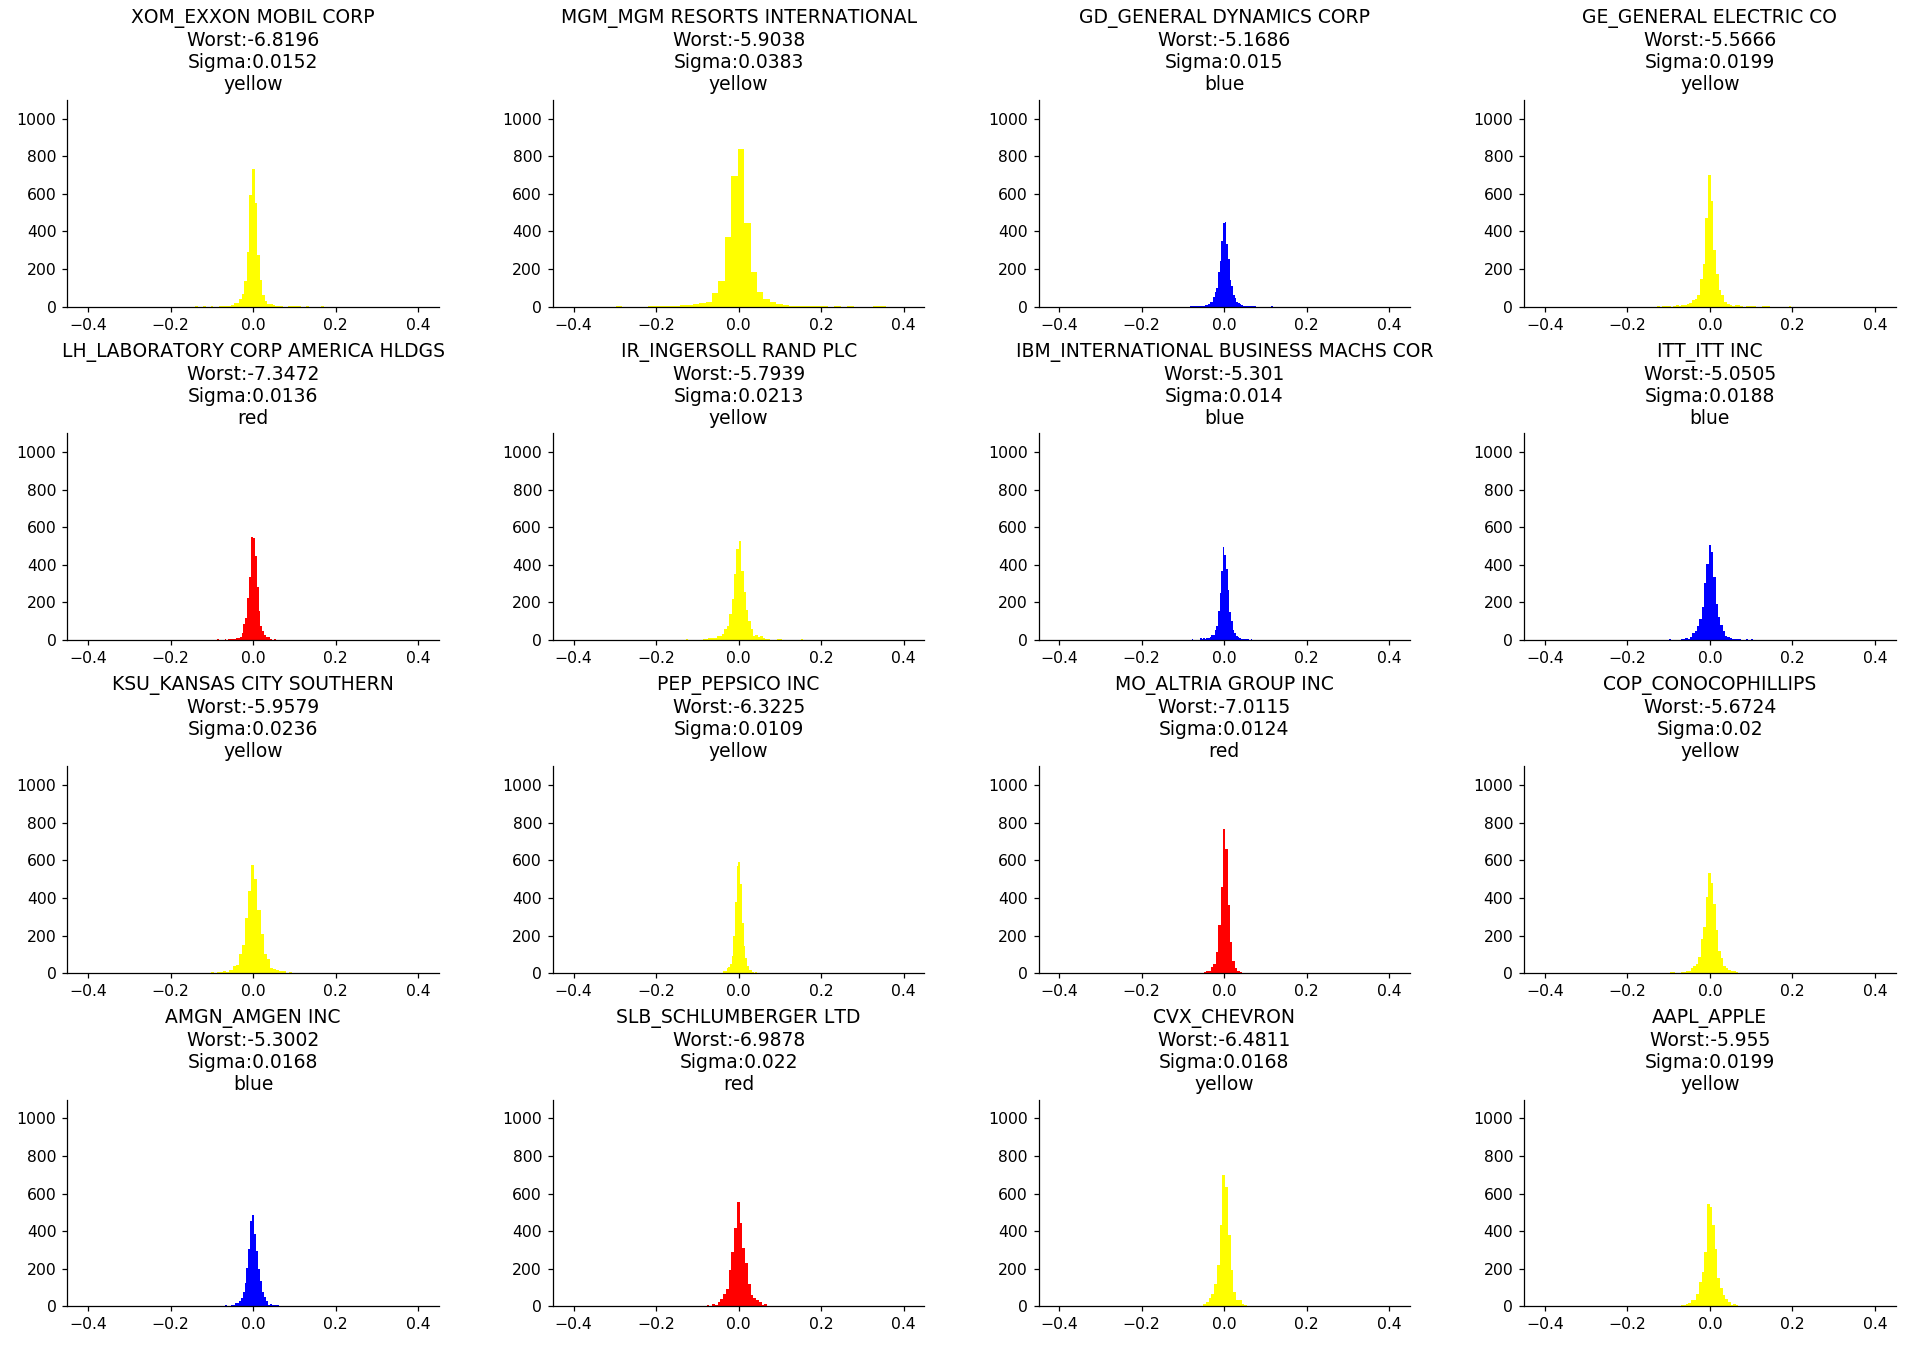









Batch 2


<IPython.core.display.Javascript object>


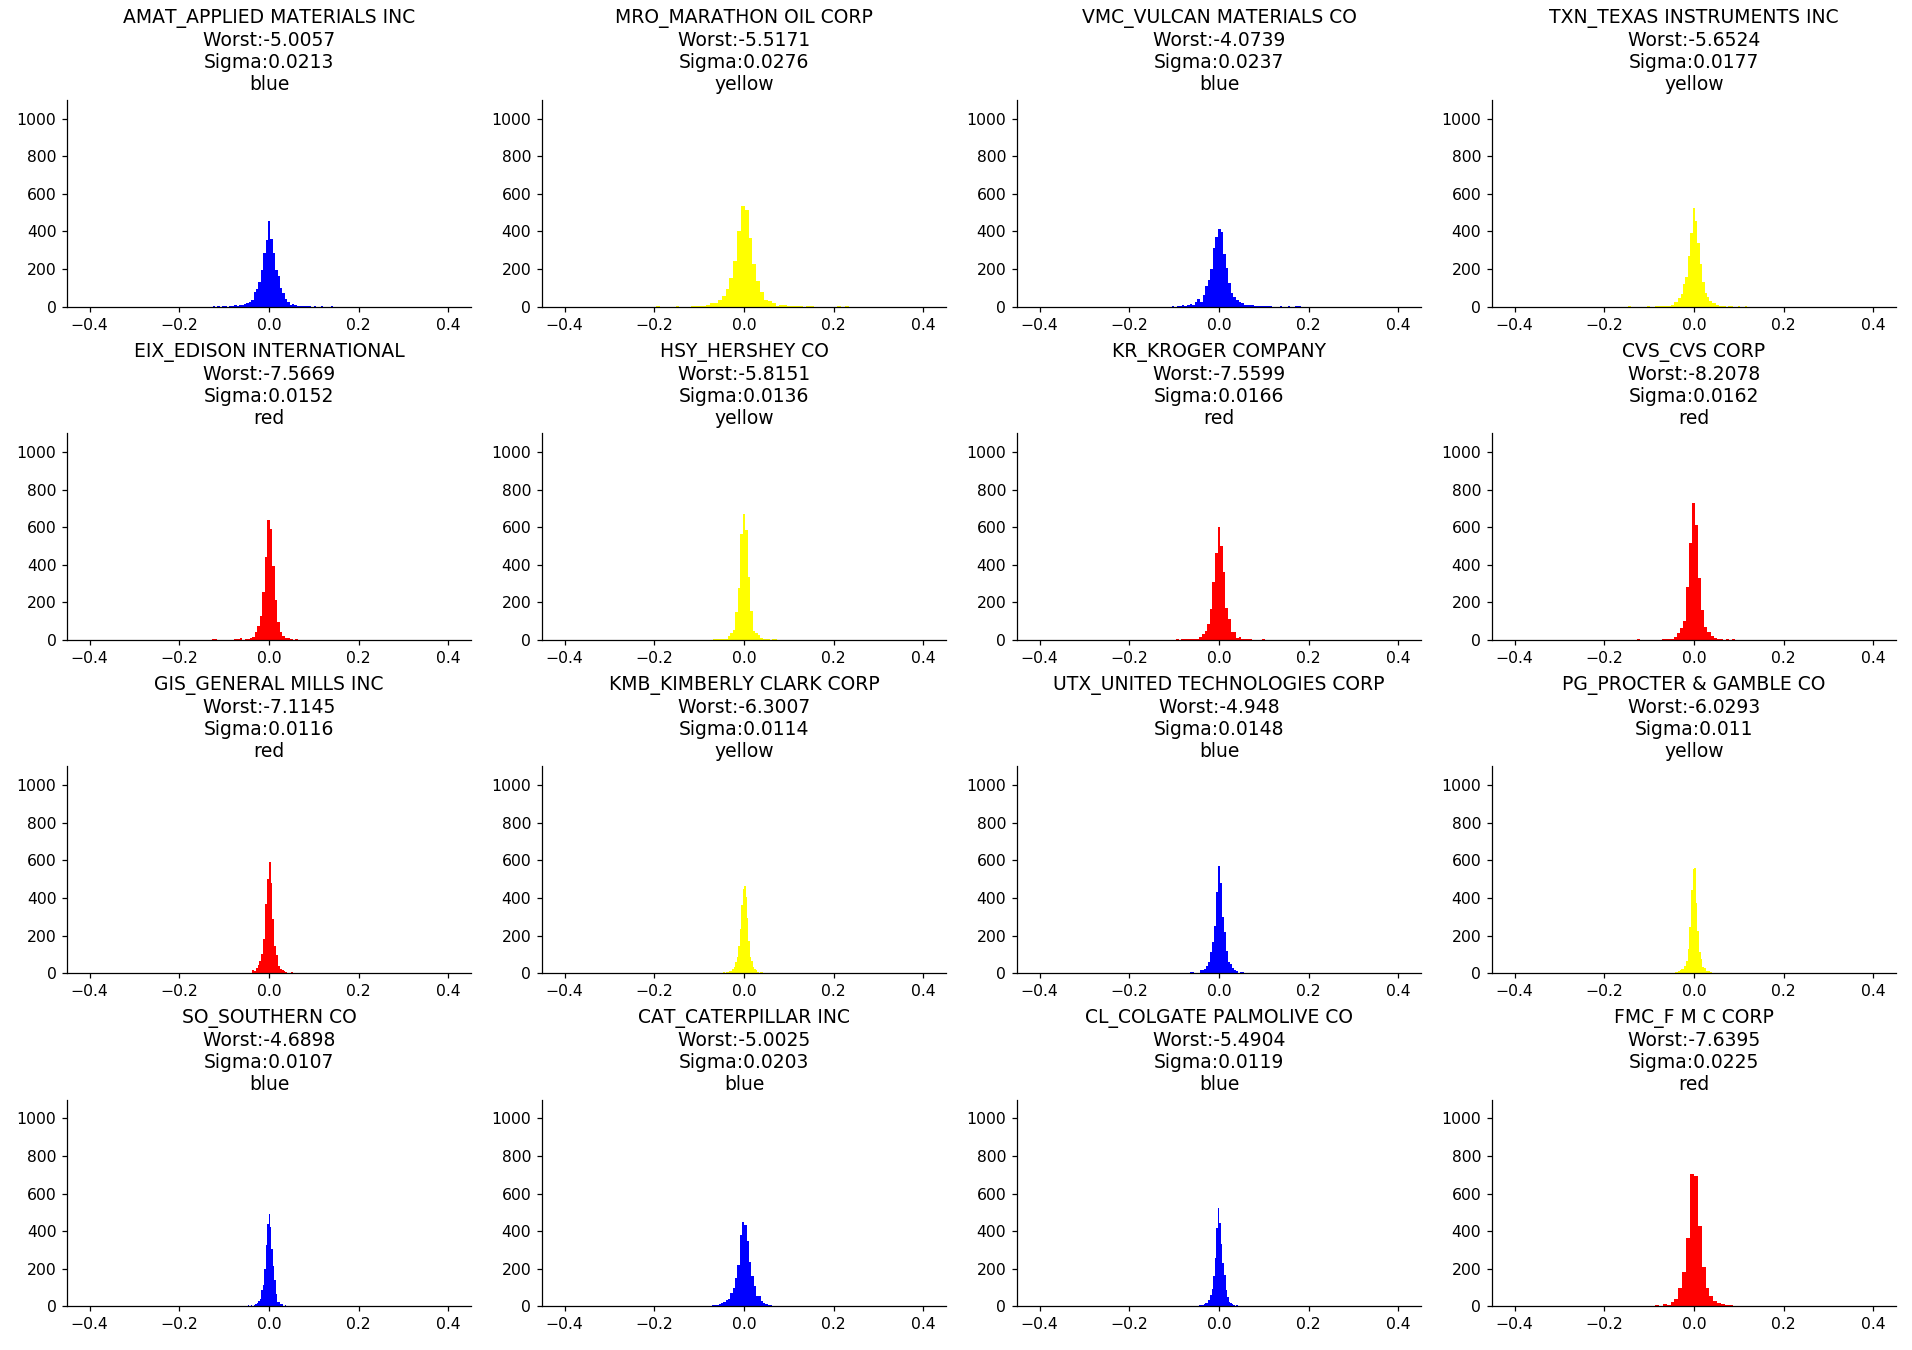









Batch 3


<IPython.core.display.Javascript object>


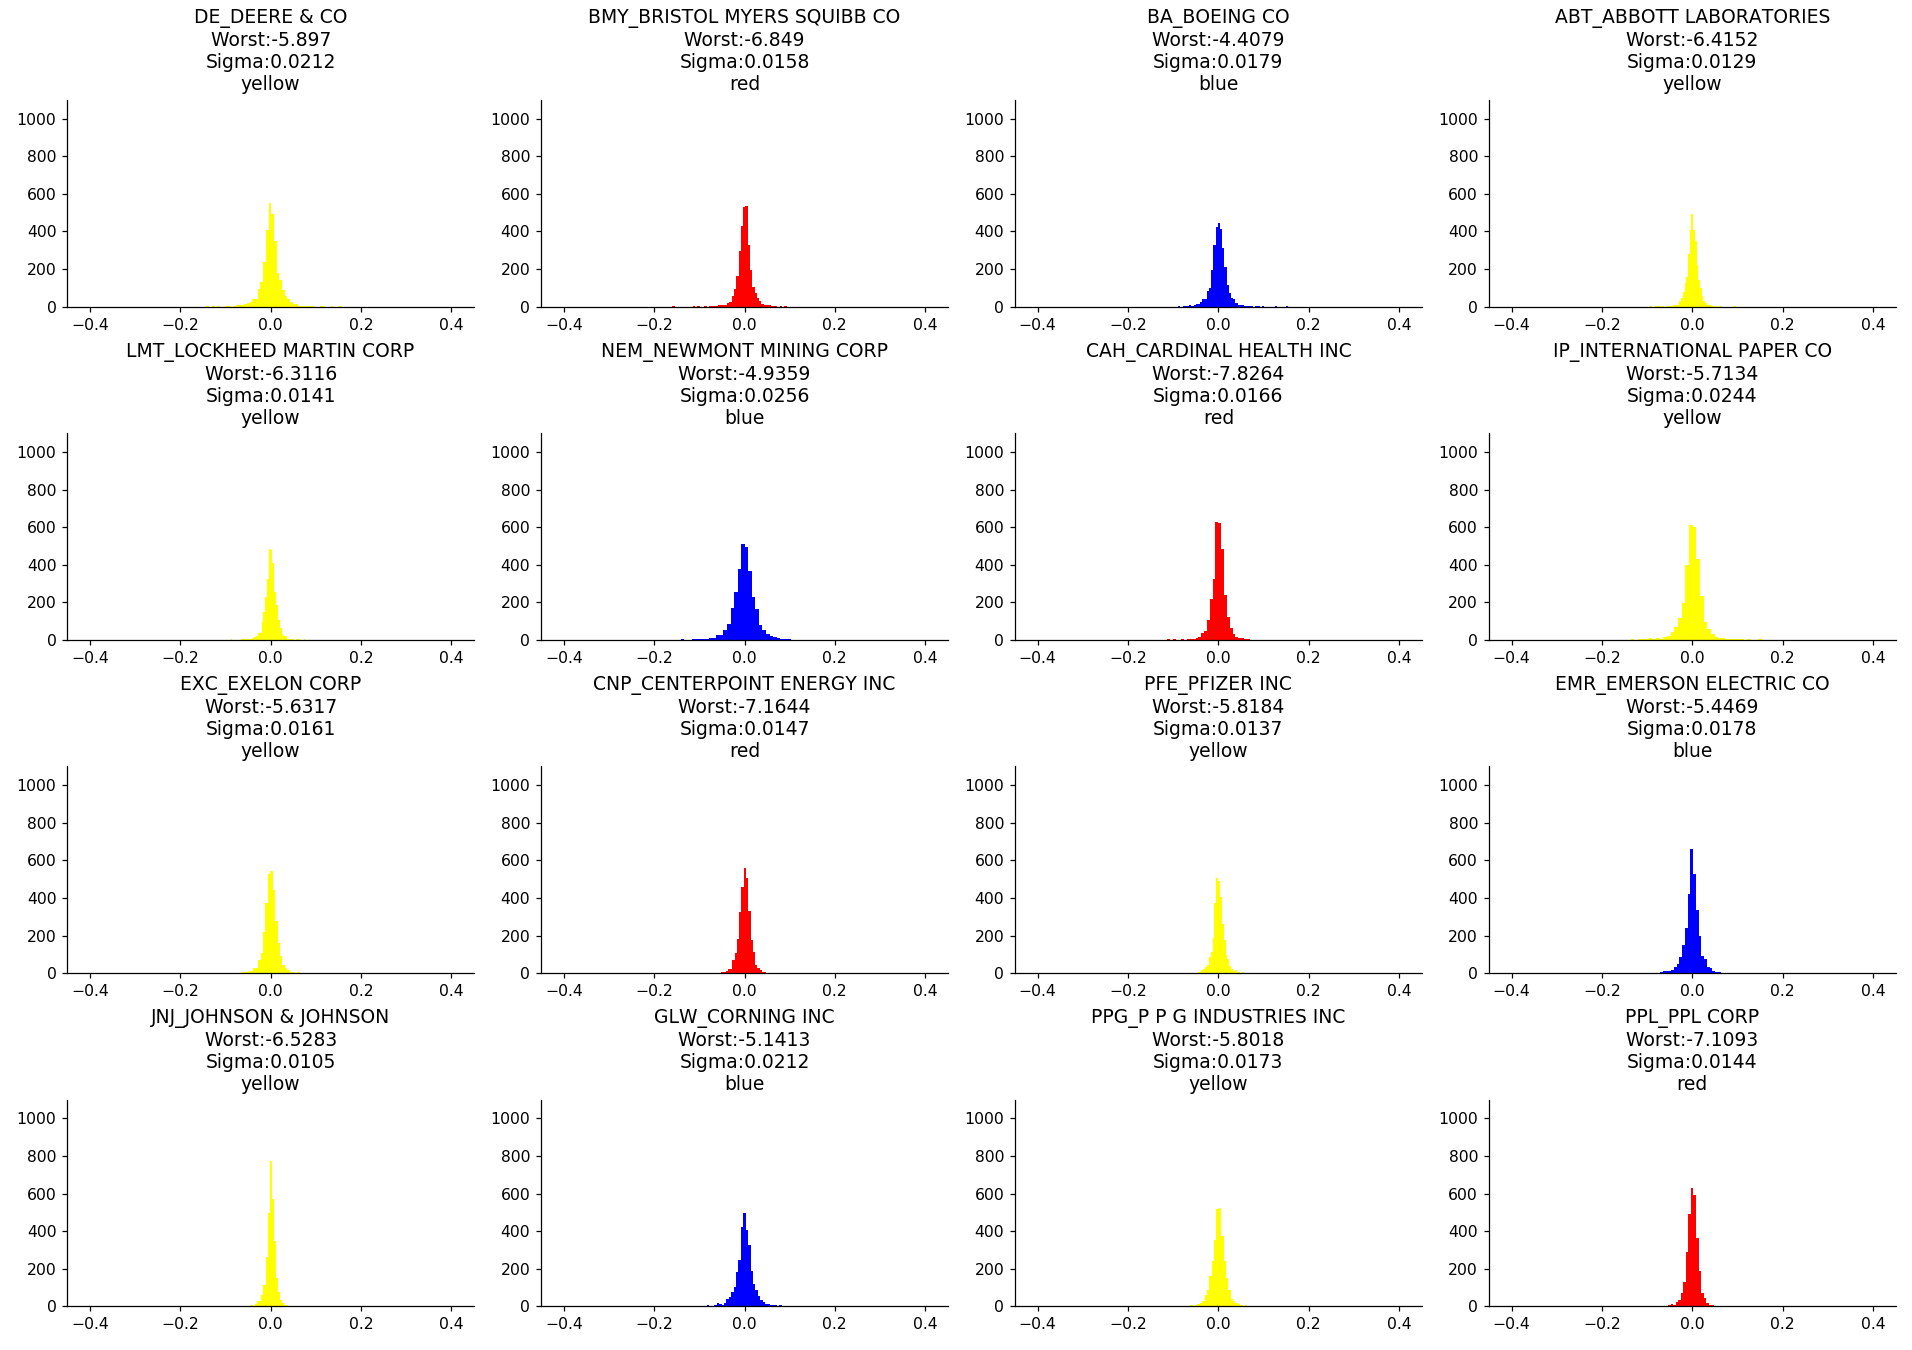









Batch 4


<IPython.core.display.Javascript object>


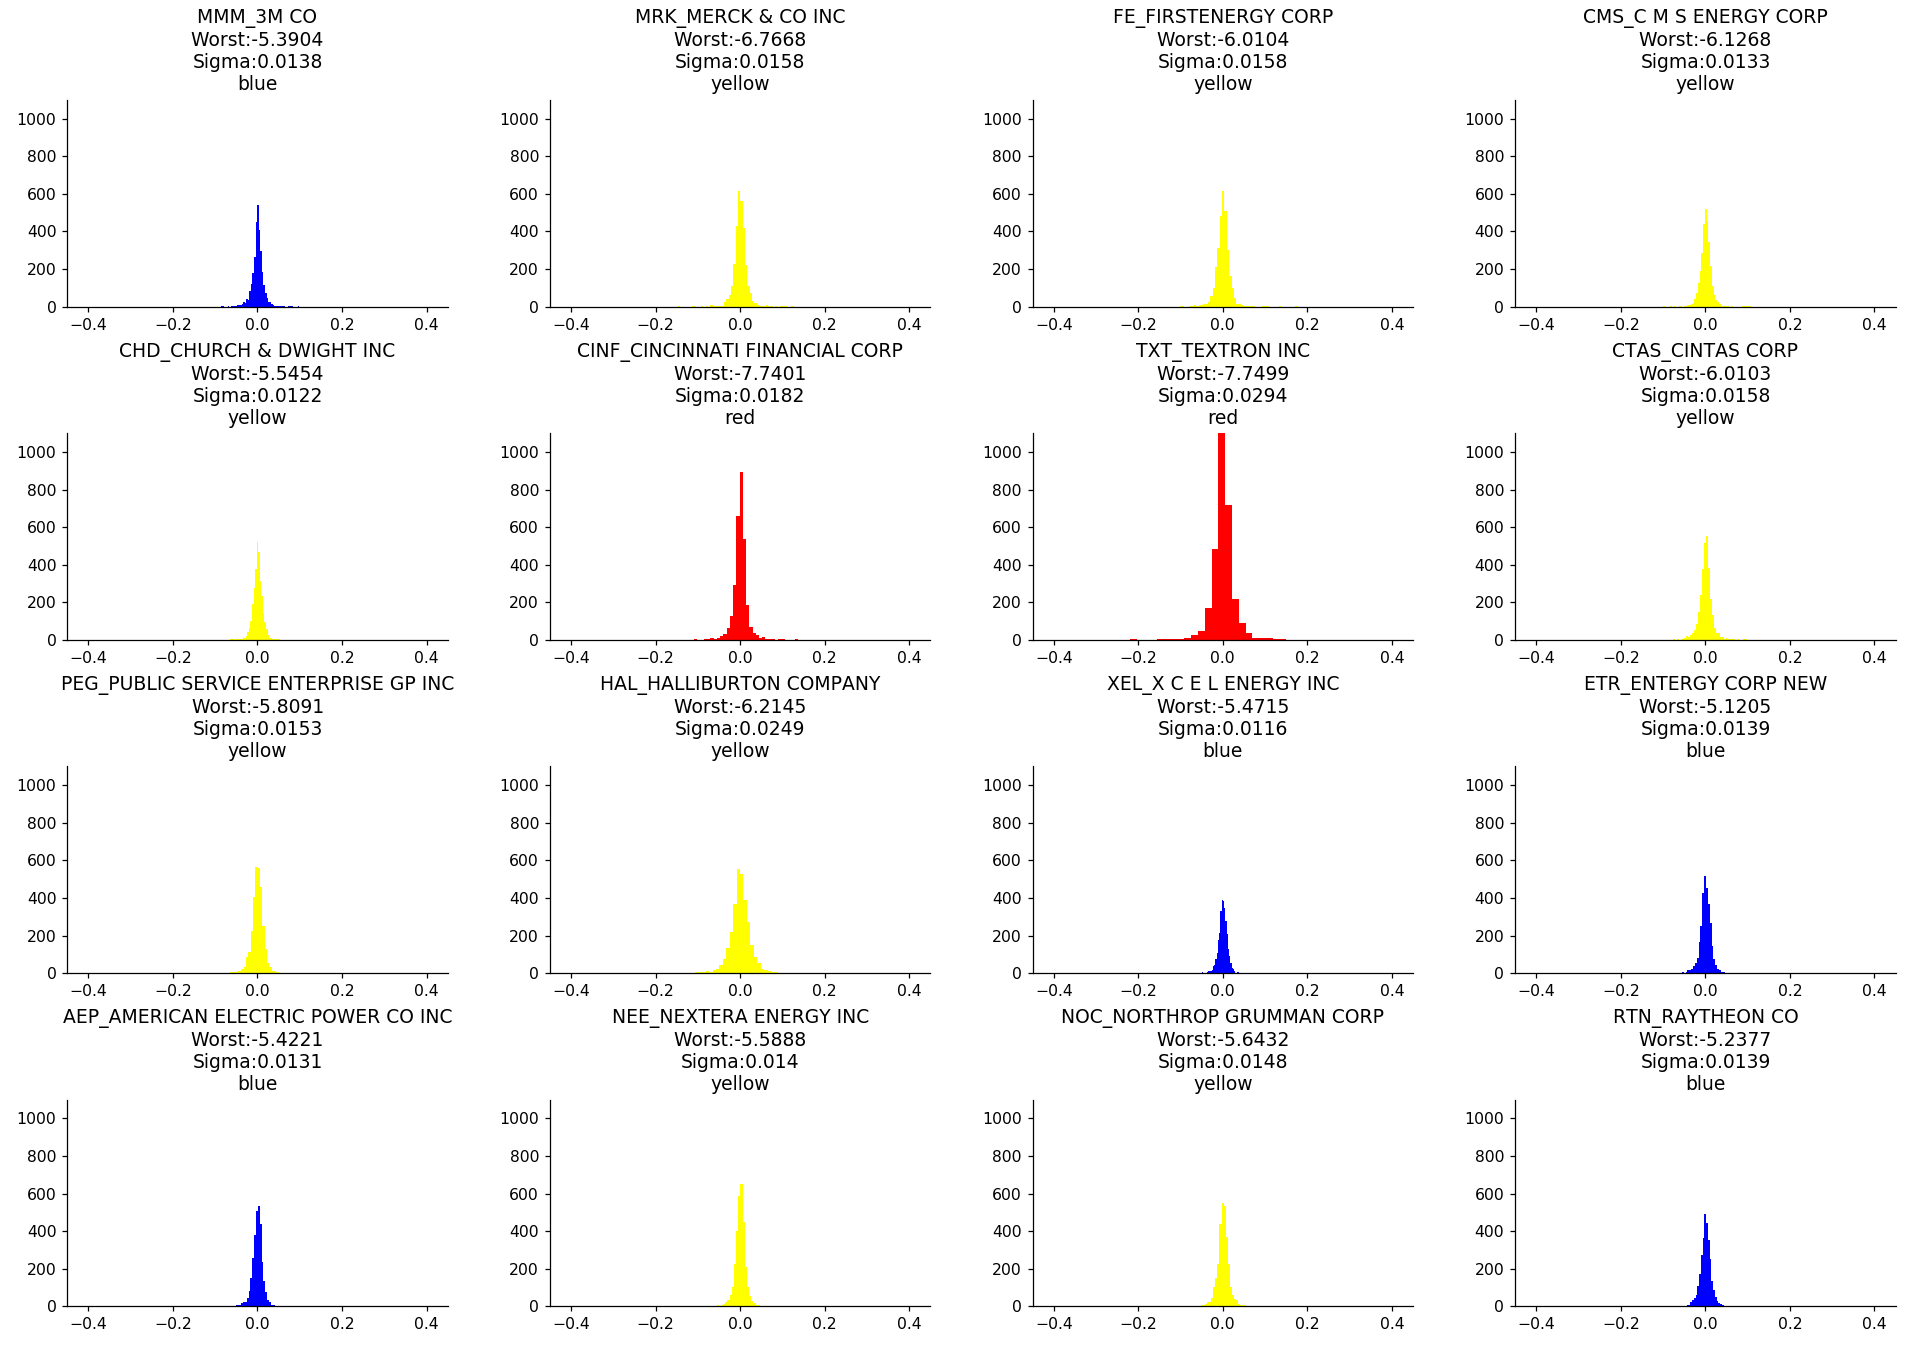









Batch 5


<IPython.core.display.Javascript object>


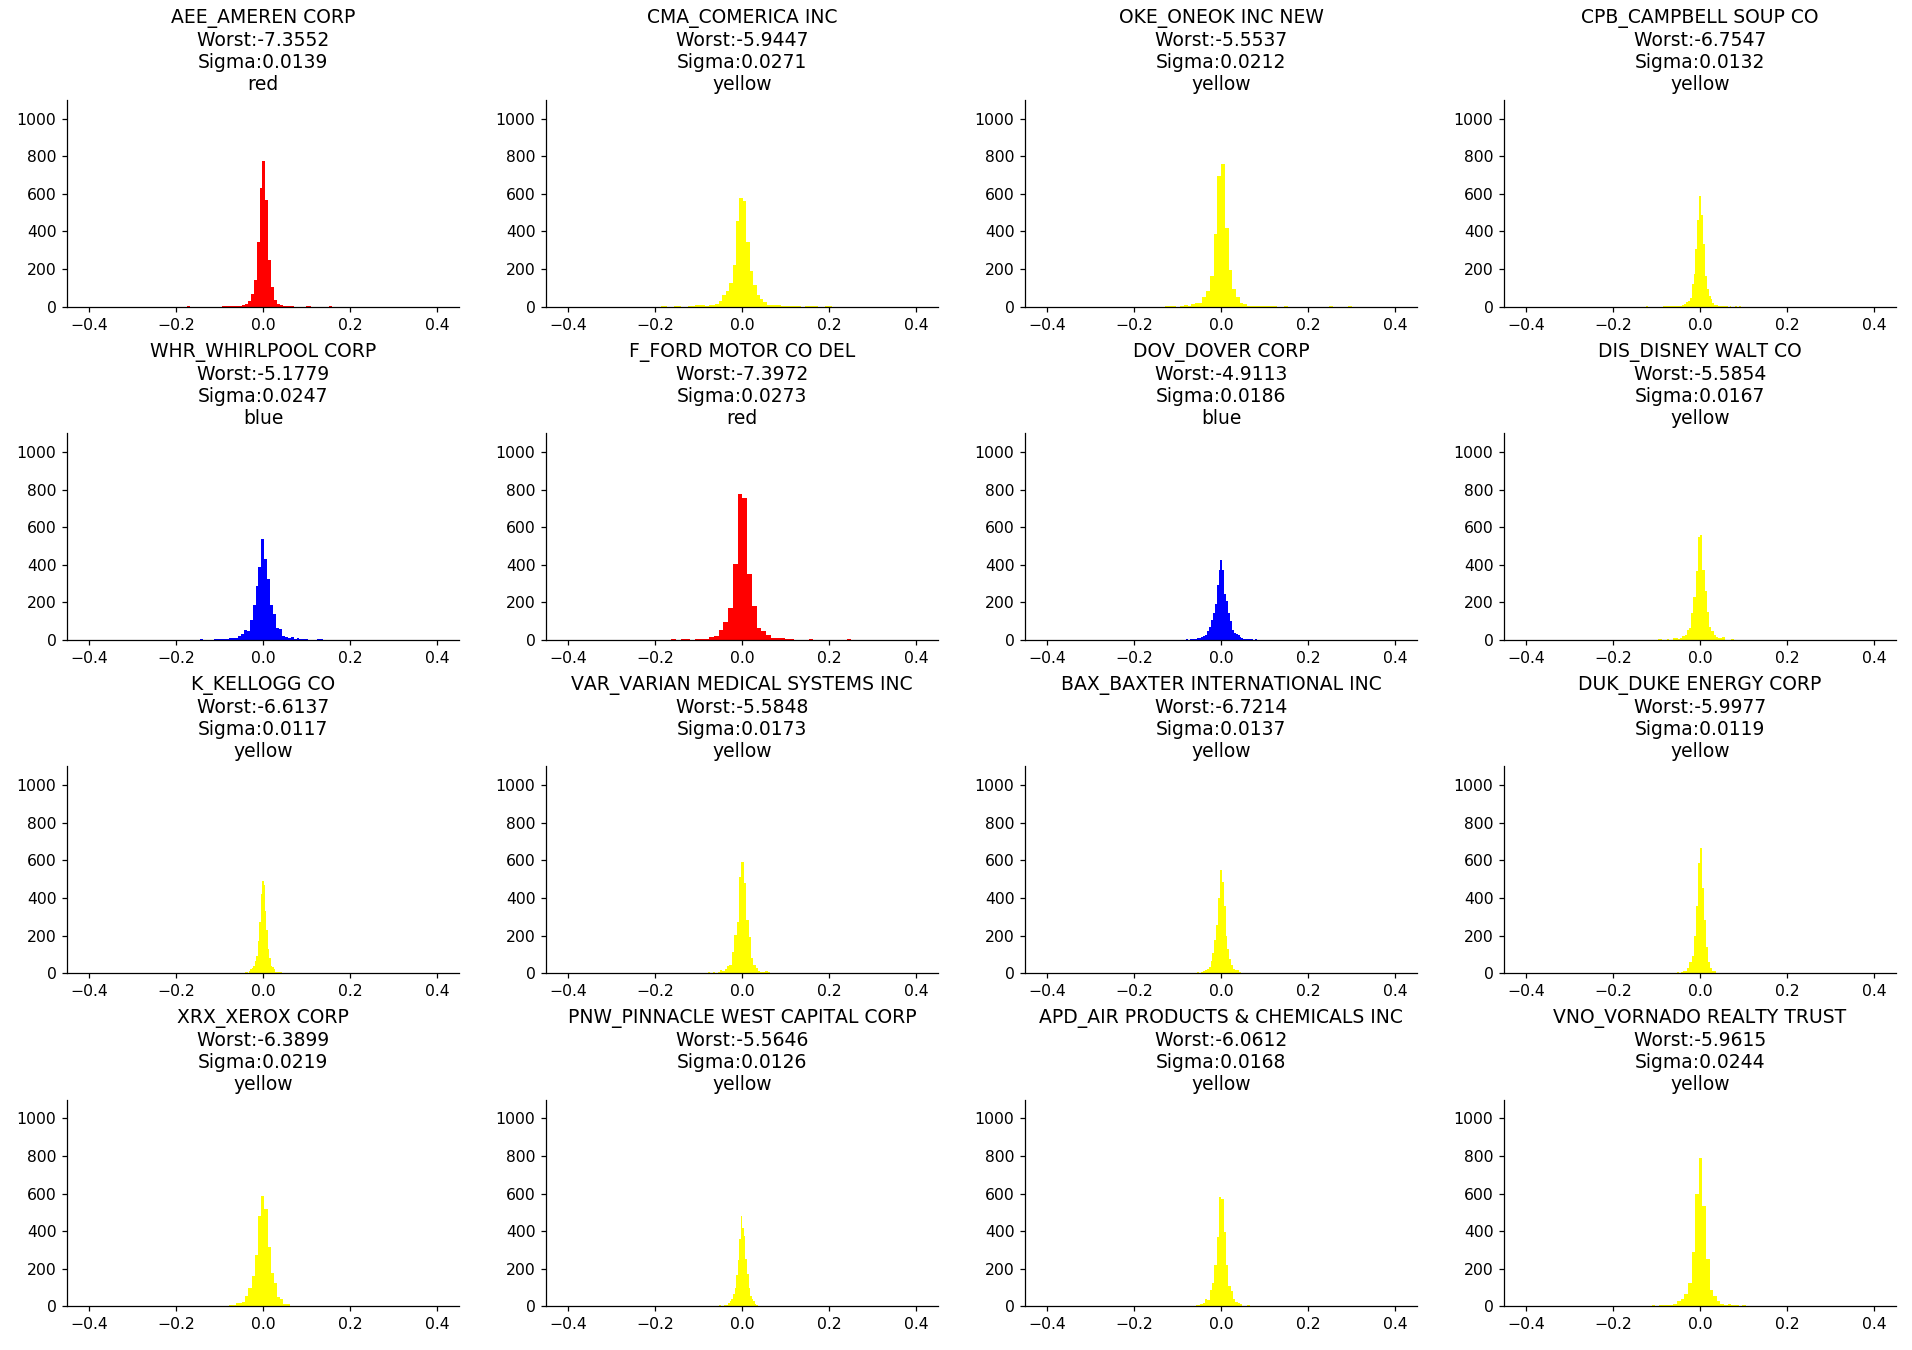









Batch 6


<IPython.core.display.Javascript object>


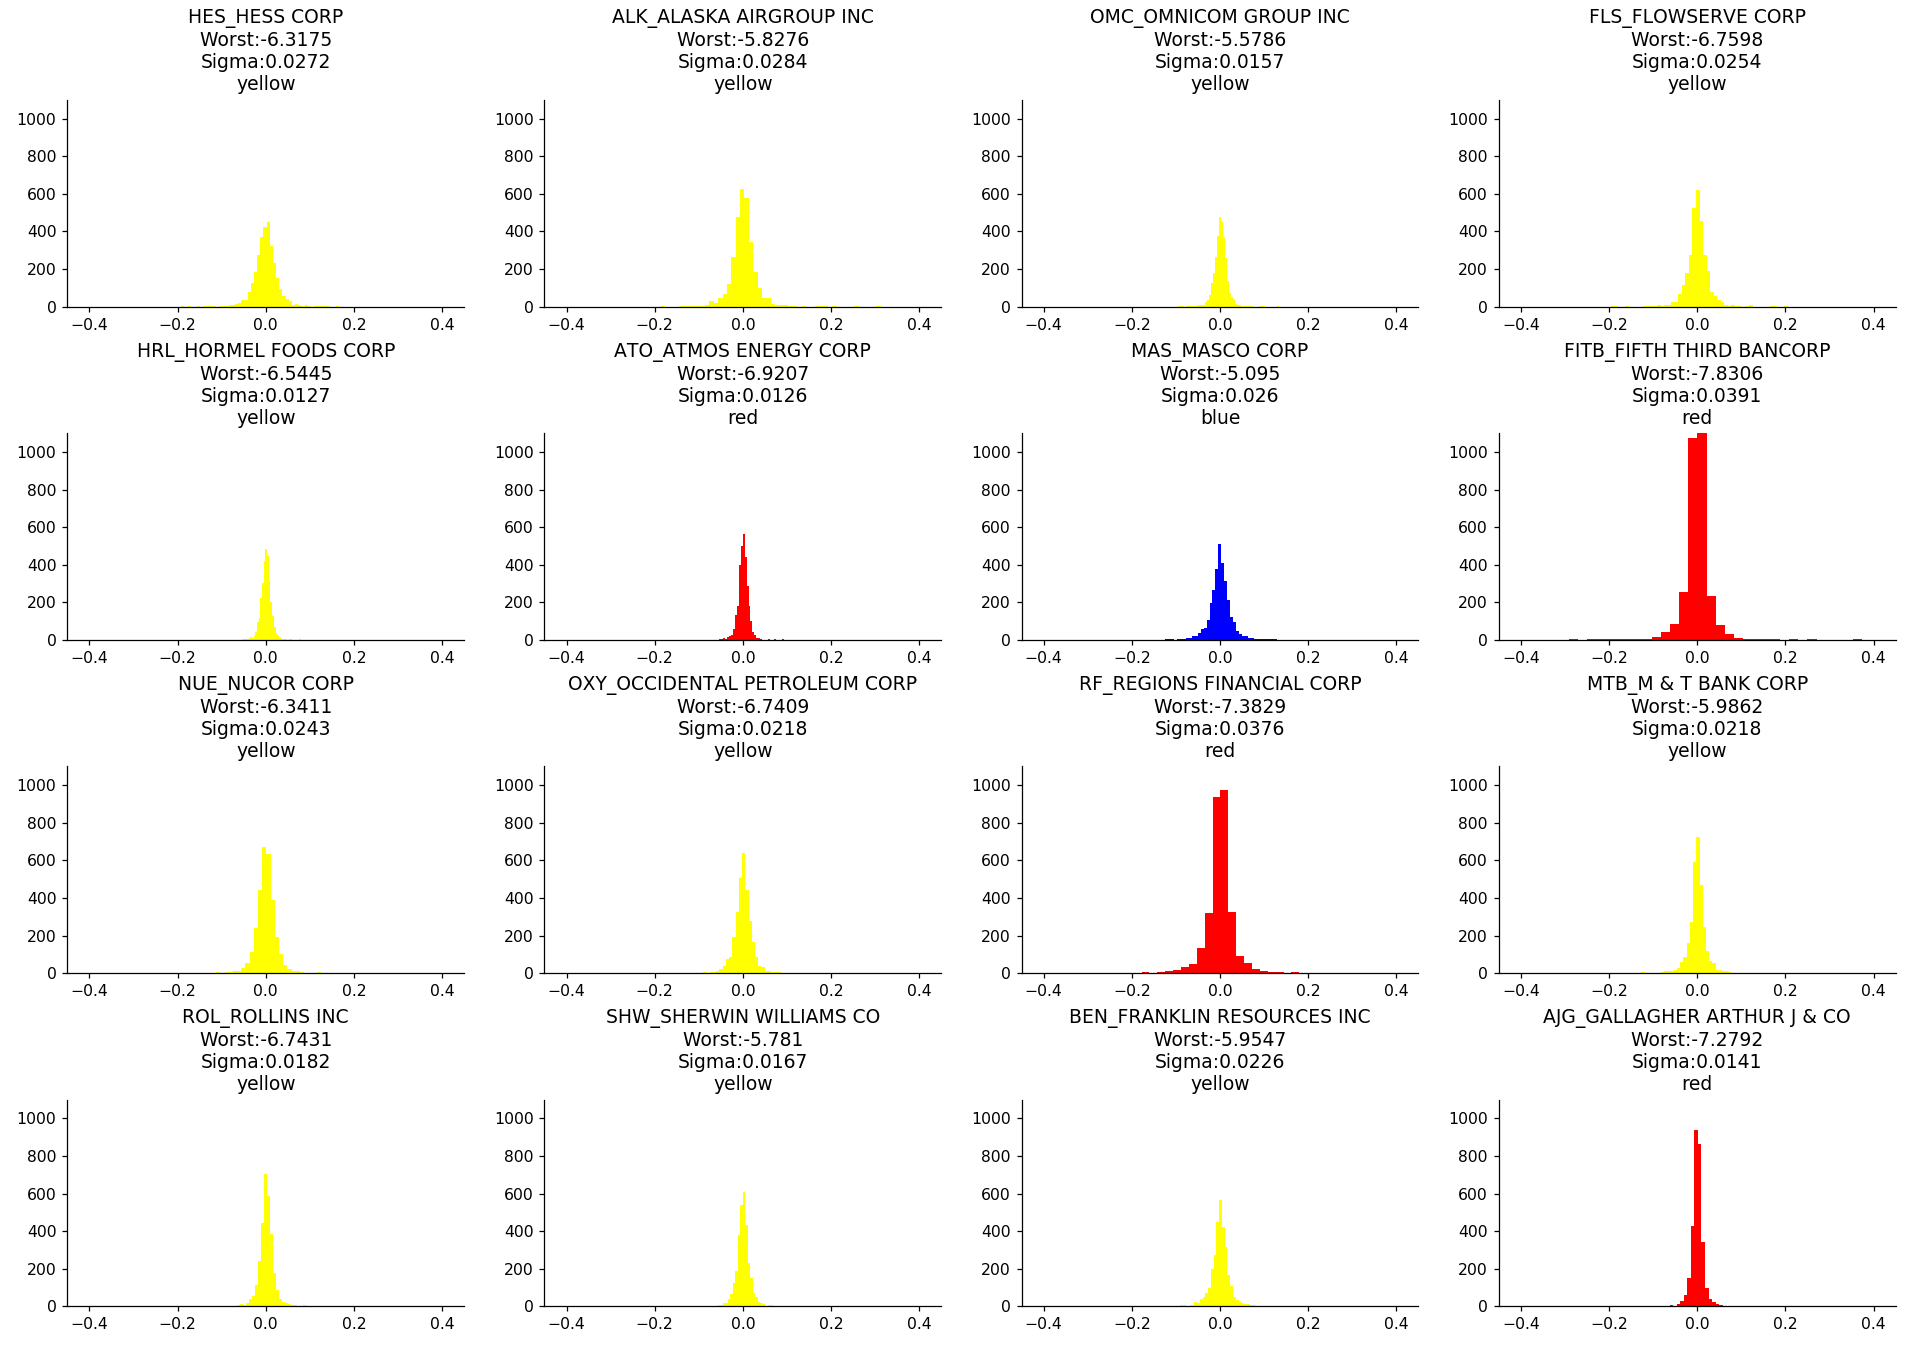









Batch 7


<IPython.core.display.Javascript object>


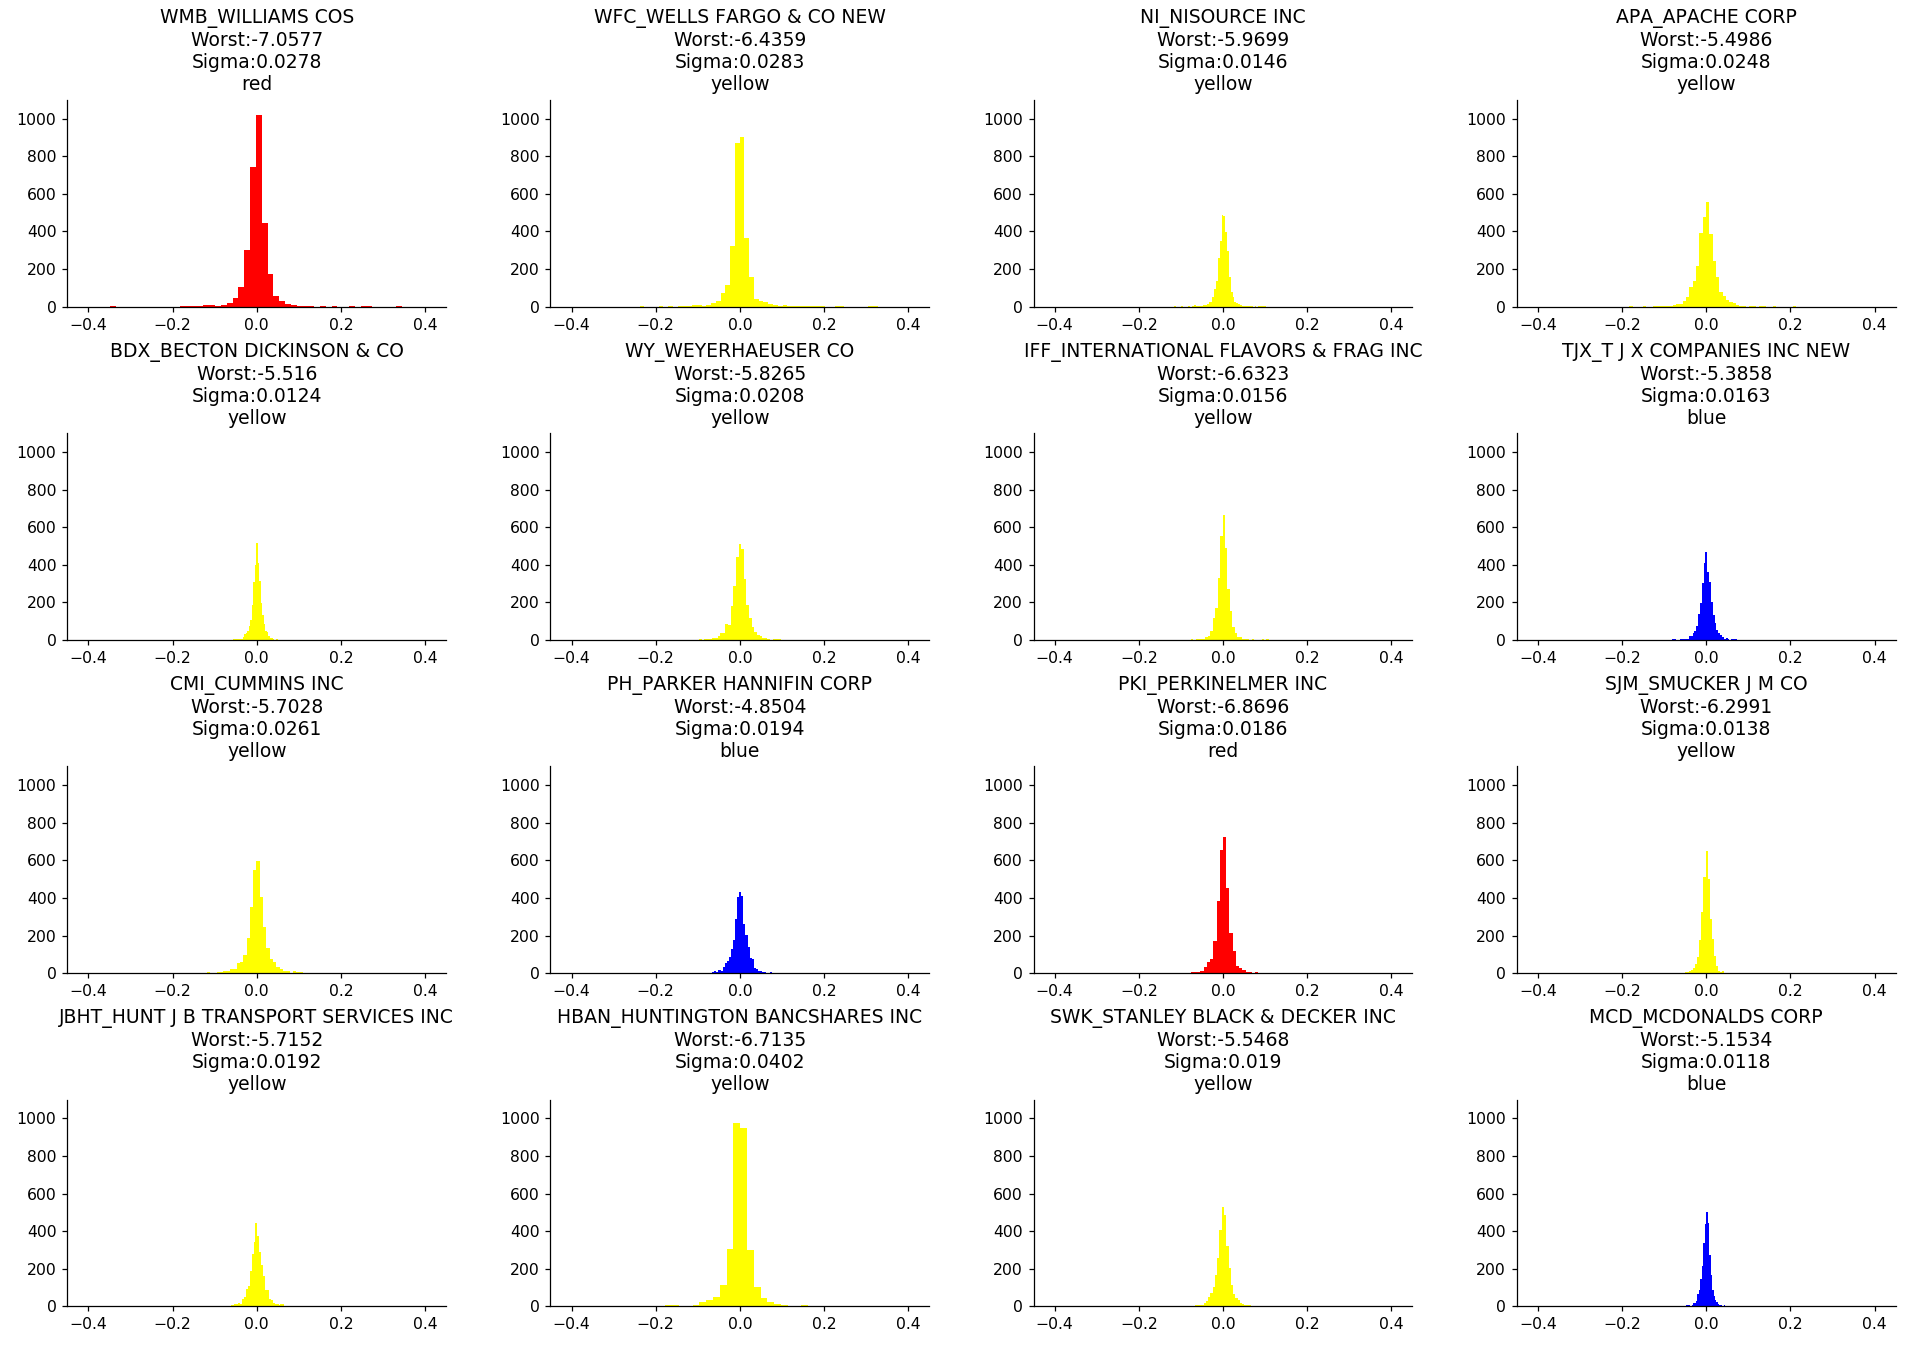









Batch 8


<IPython.core.display.Javascript object>


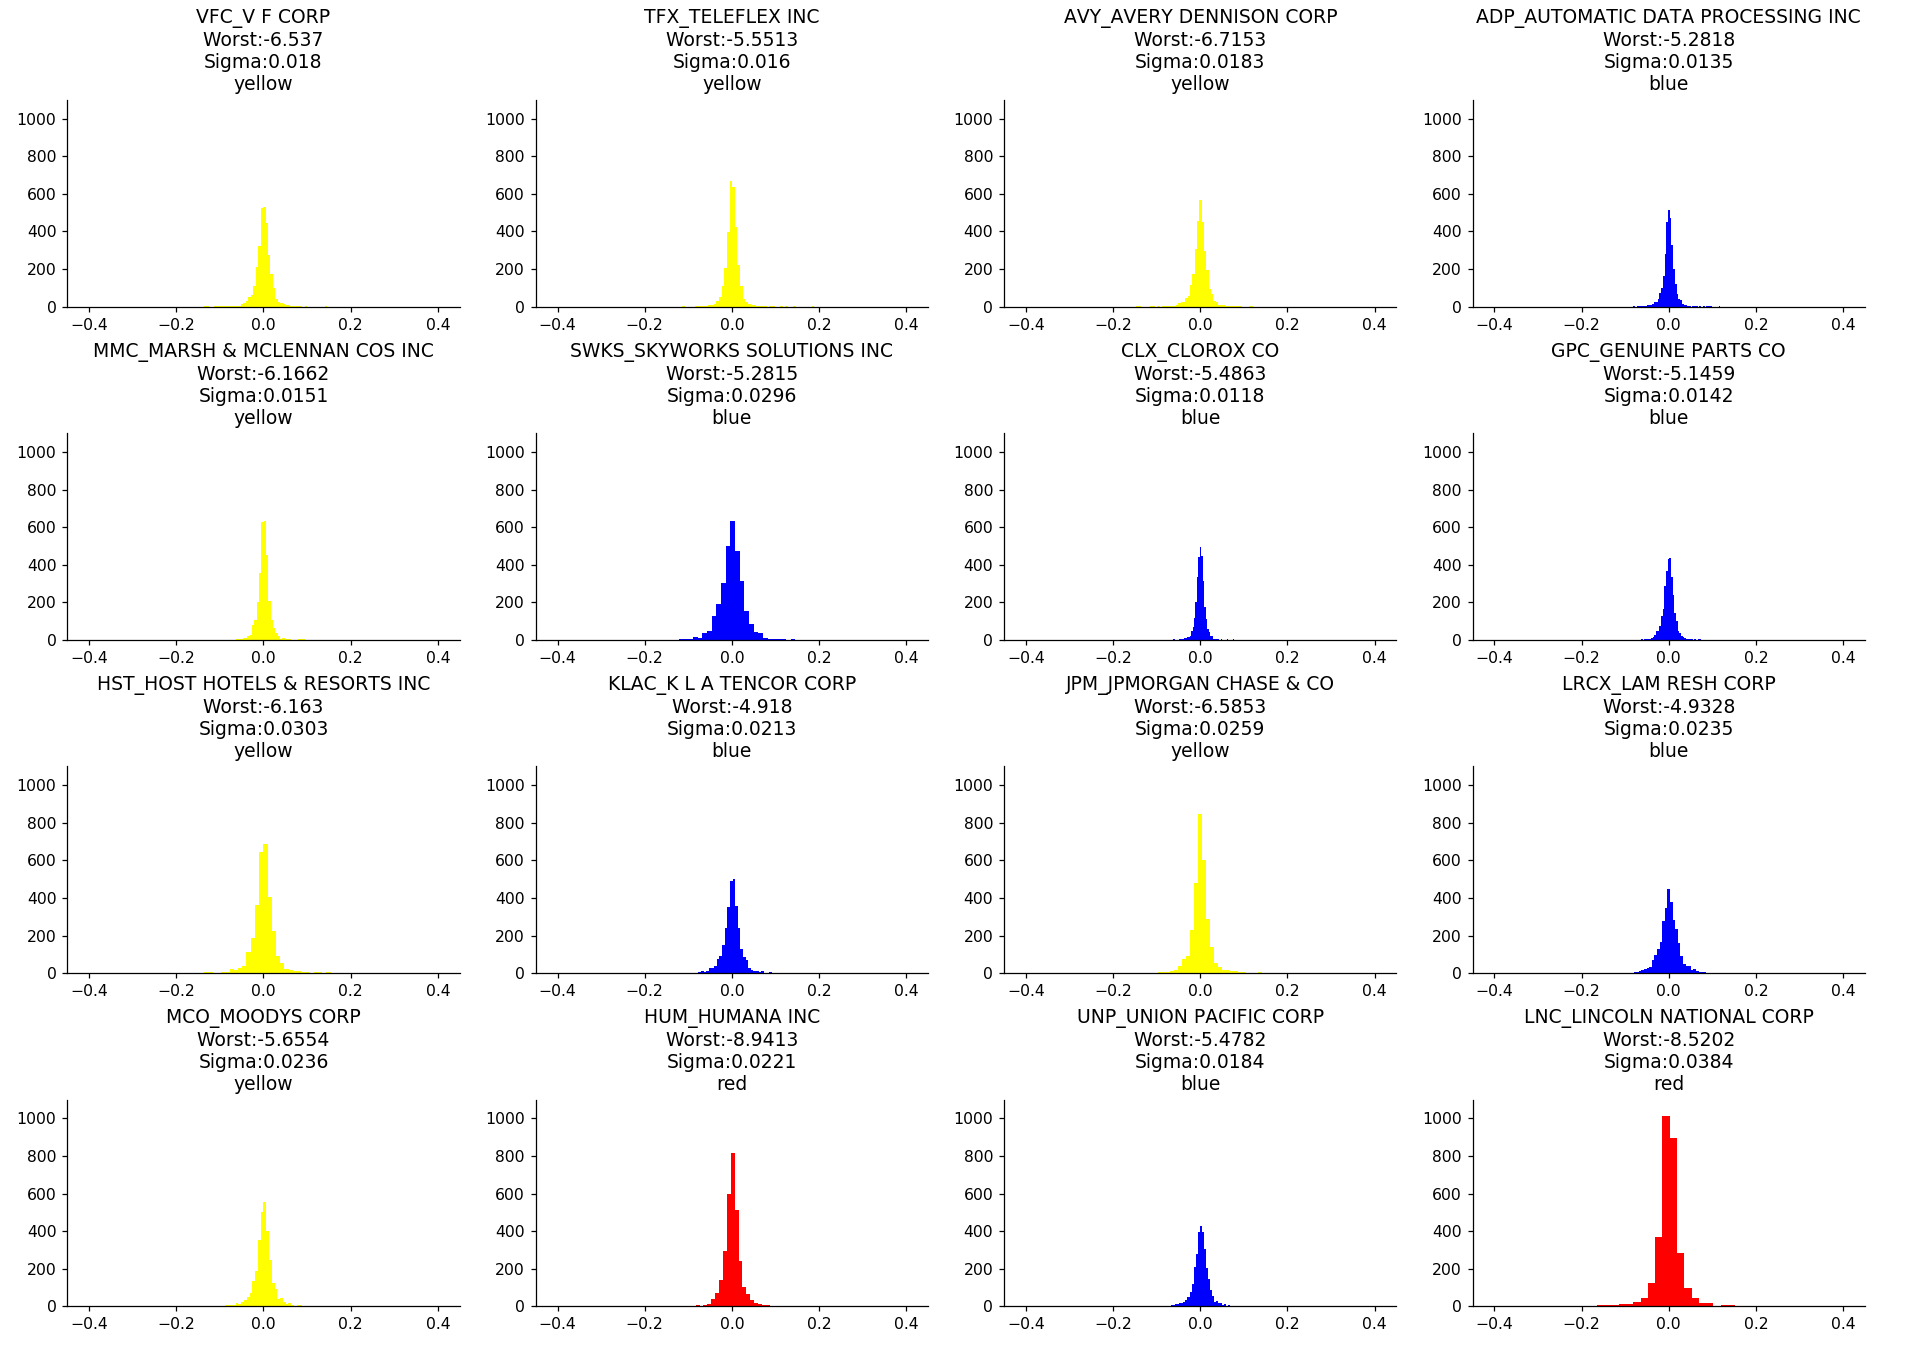









Batch 9


<IPython.core.display.Javascript object>


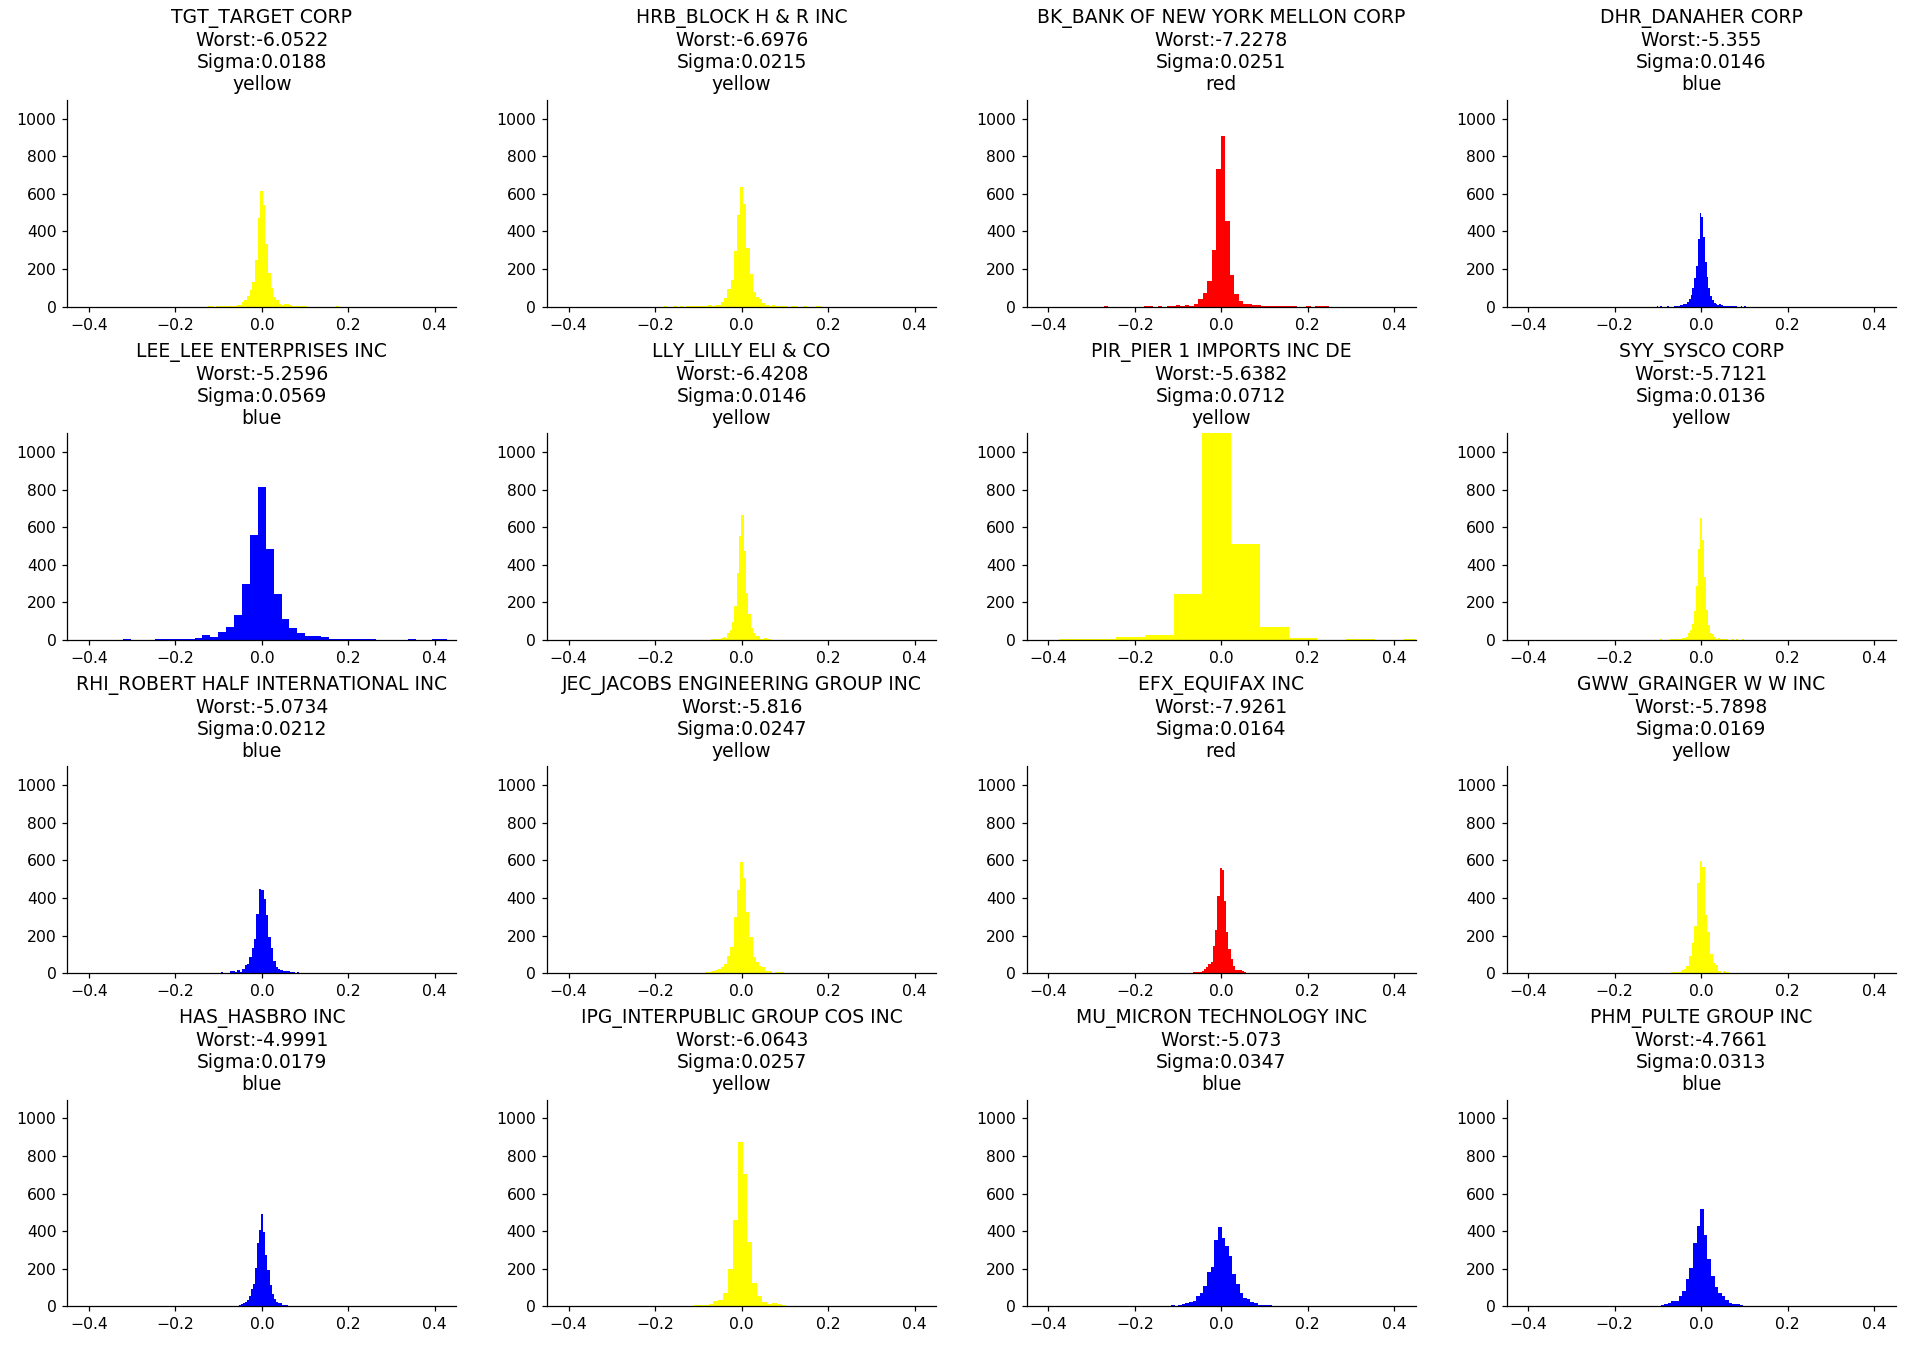









Batch 10


<IPython.core.display.Javascript object>


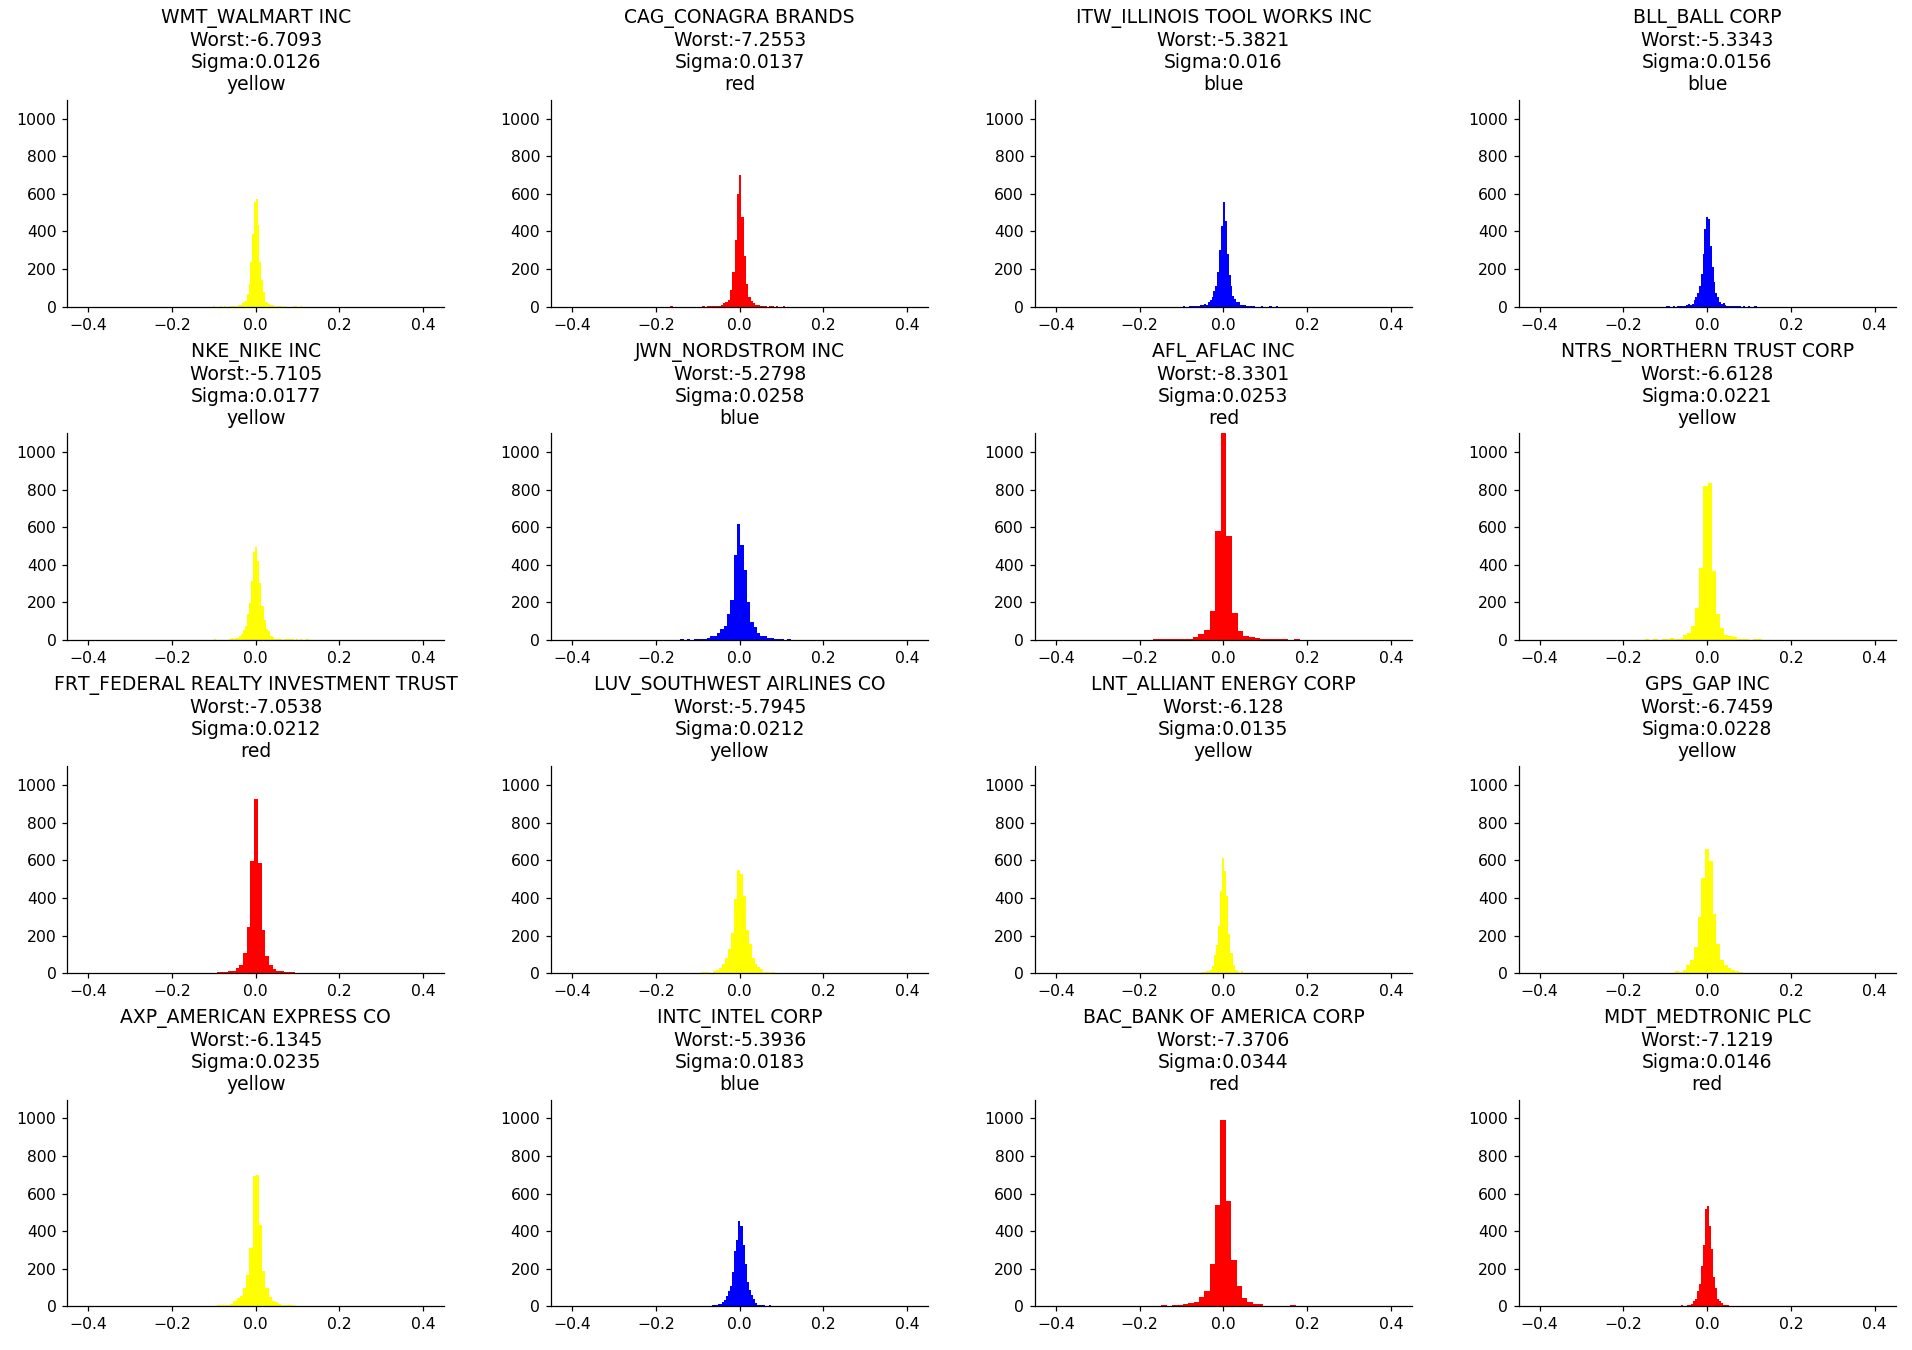









Batch 11


<IPython.core.display.Javascript object>


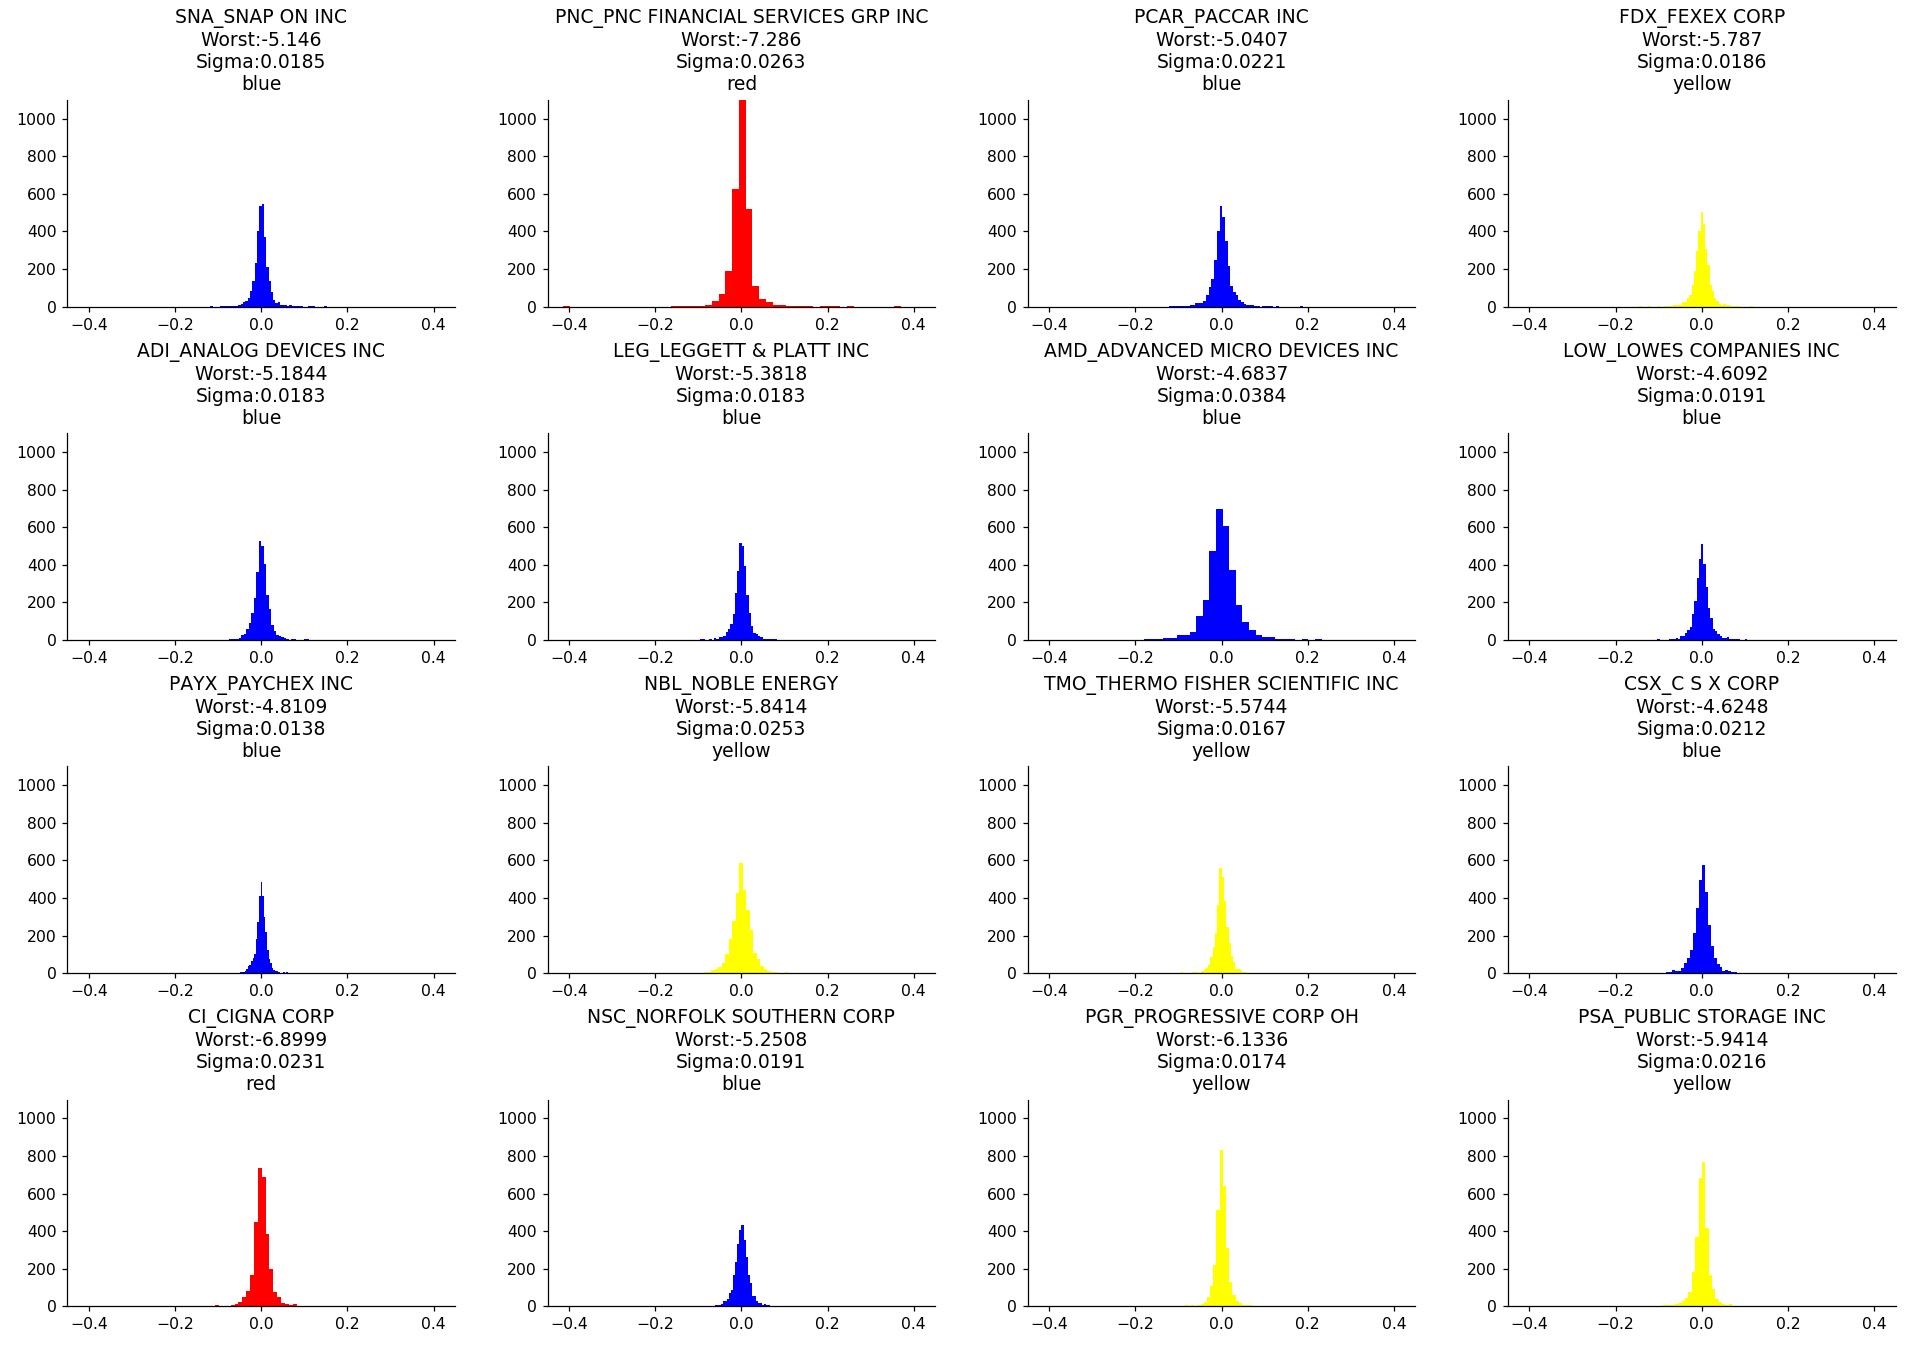









Batch 12


<IPython.core.display.Javascript object>


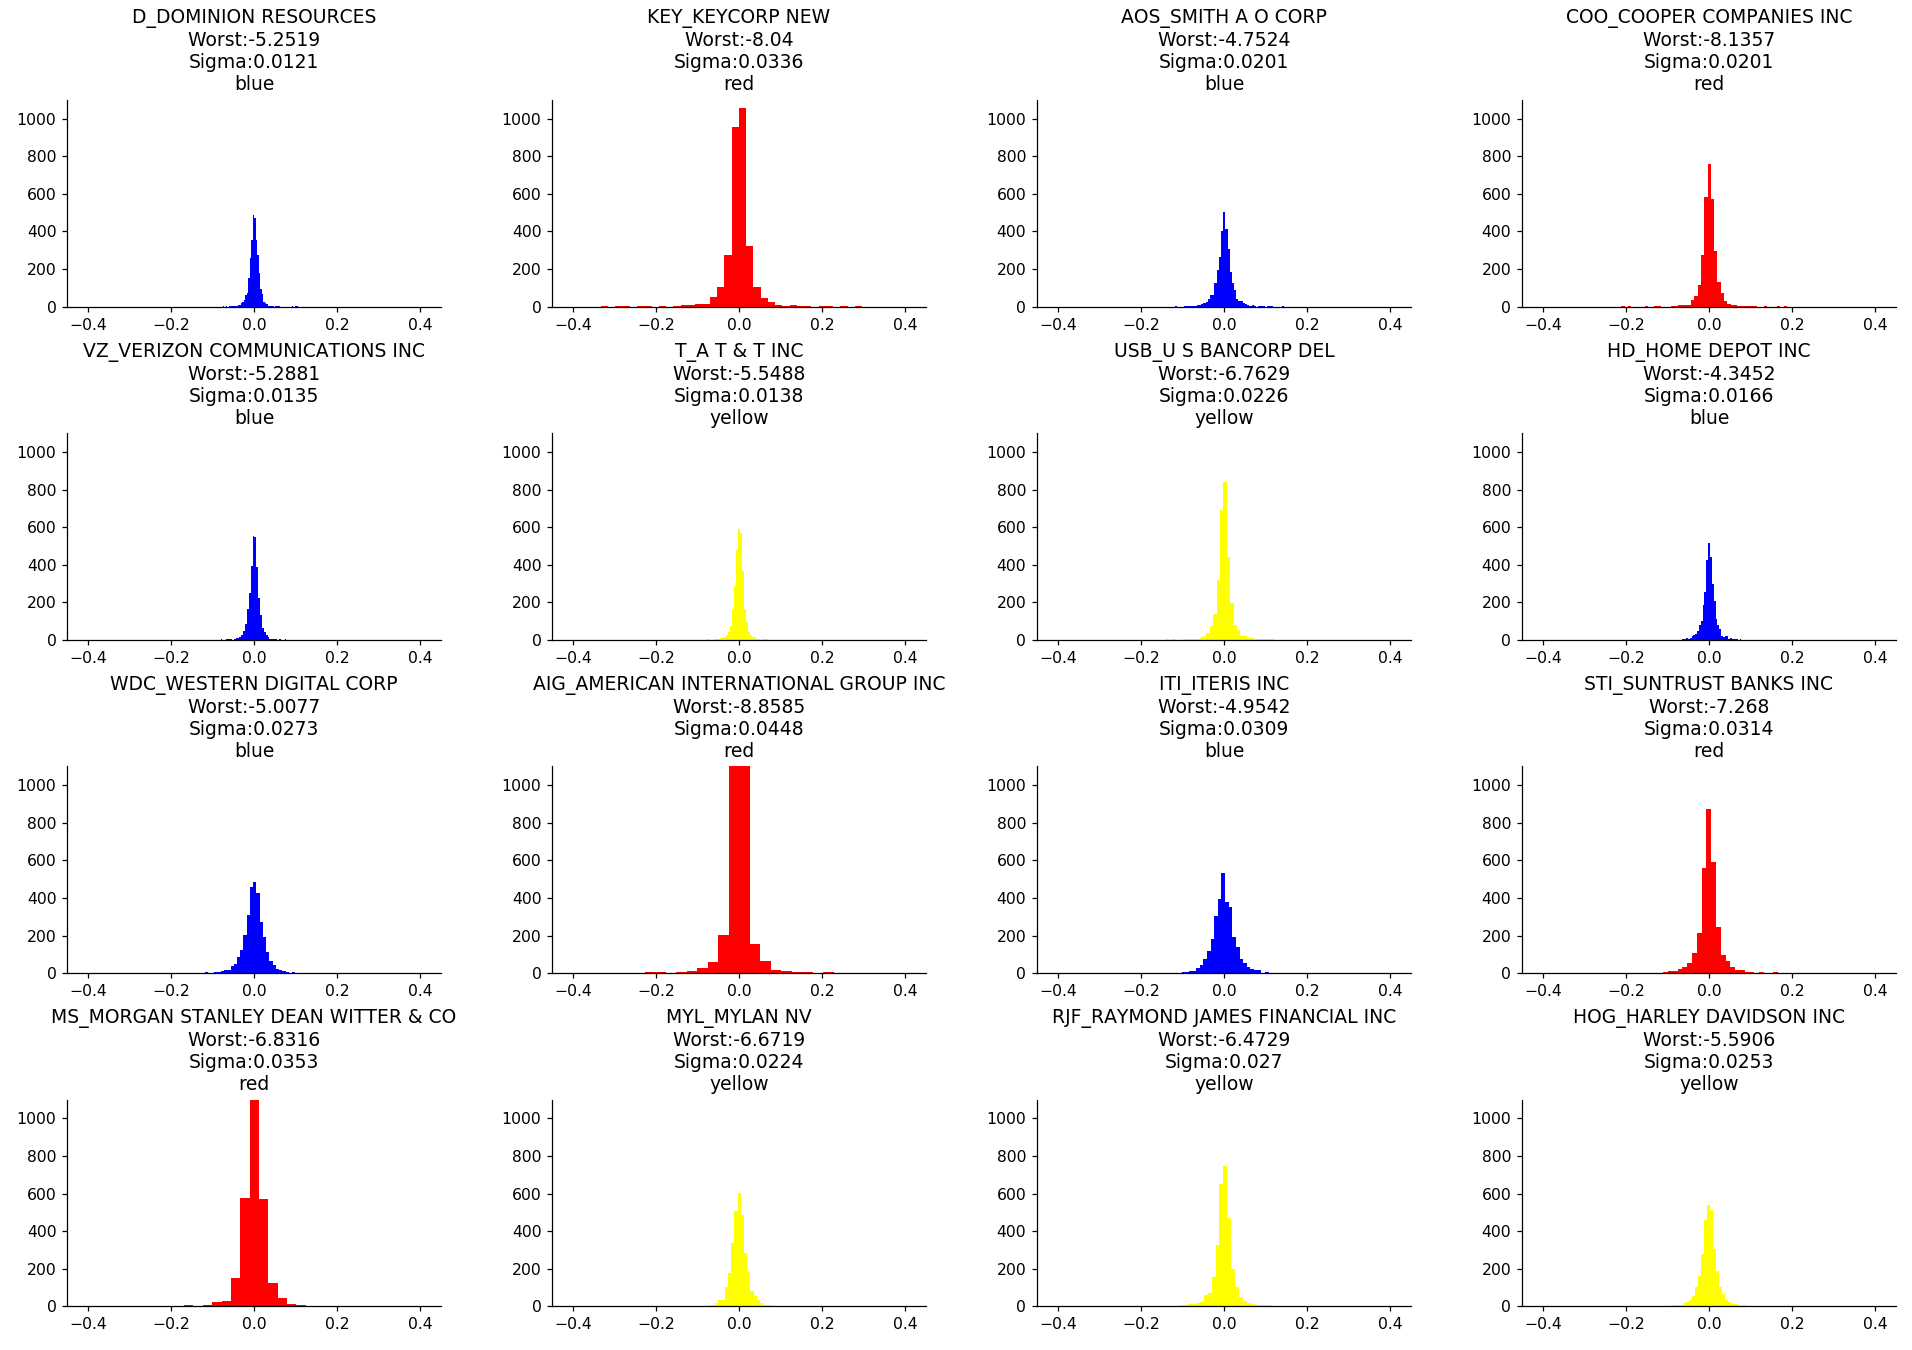









Batch 13


<IPython.core.display.Javascript object>


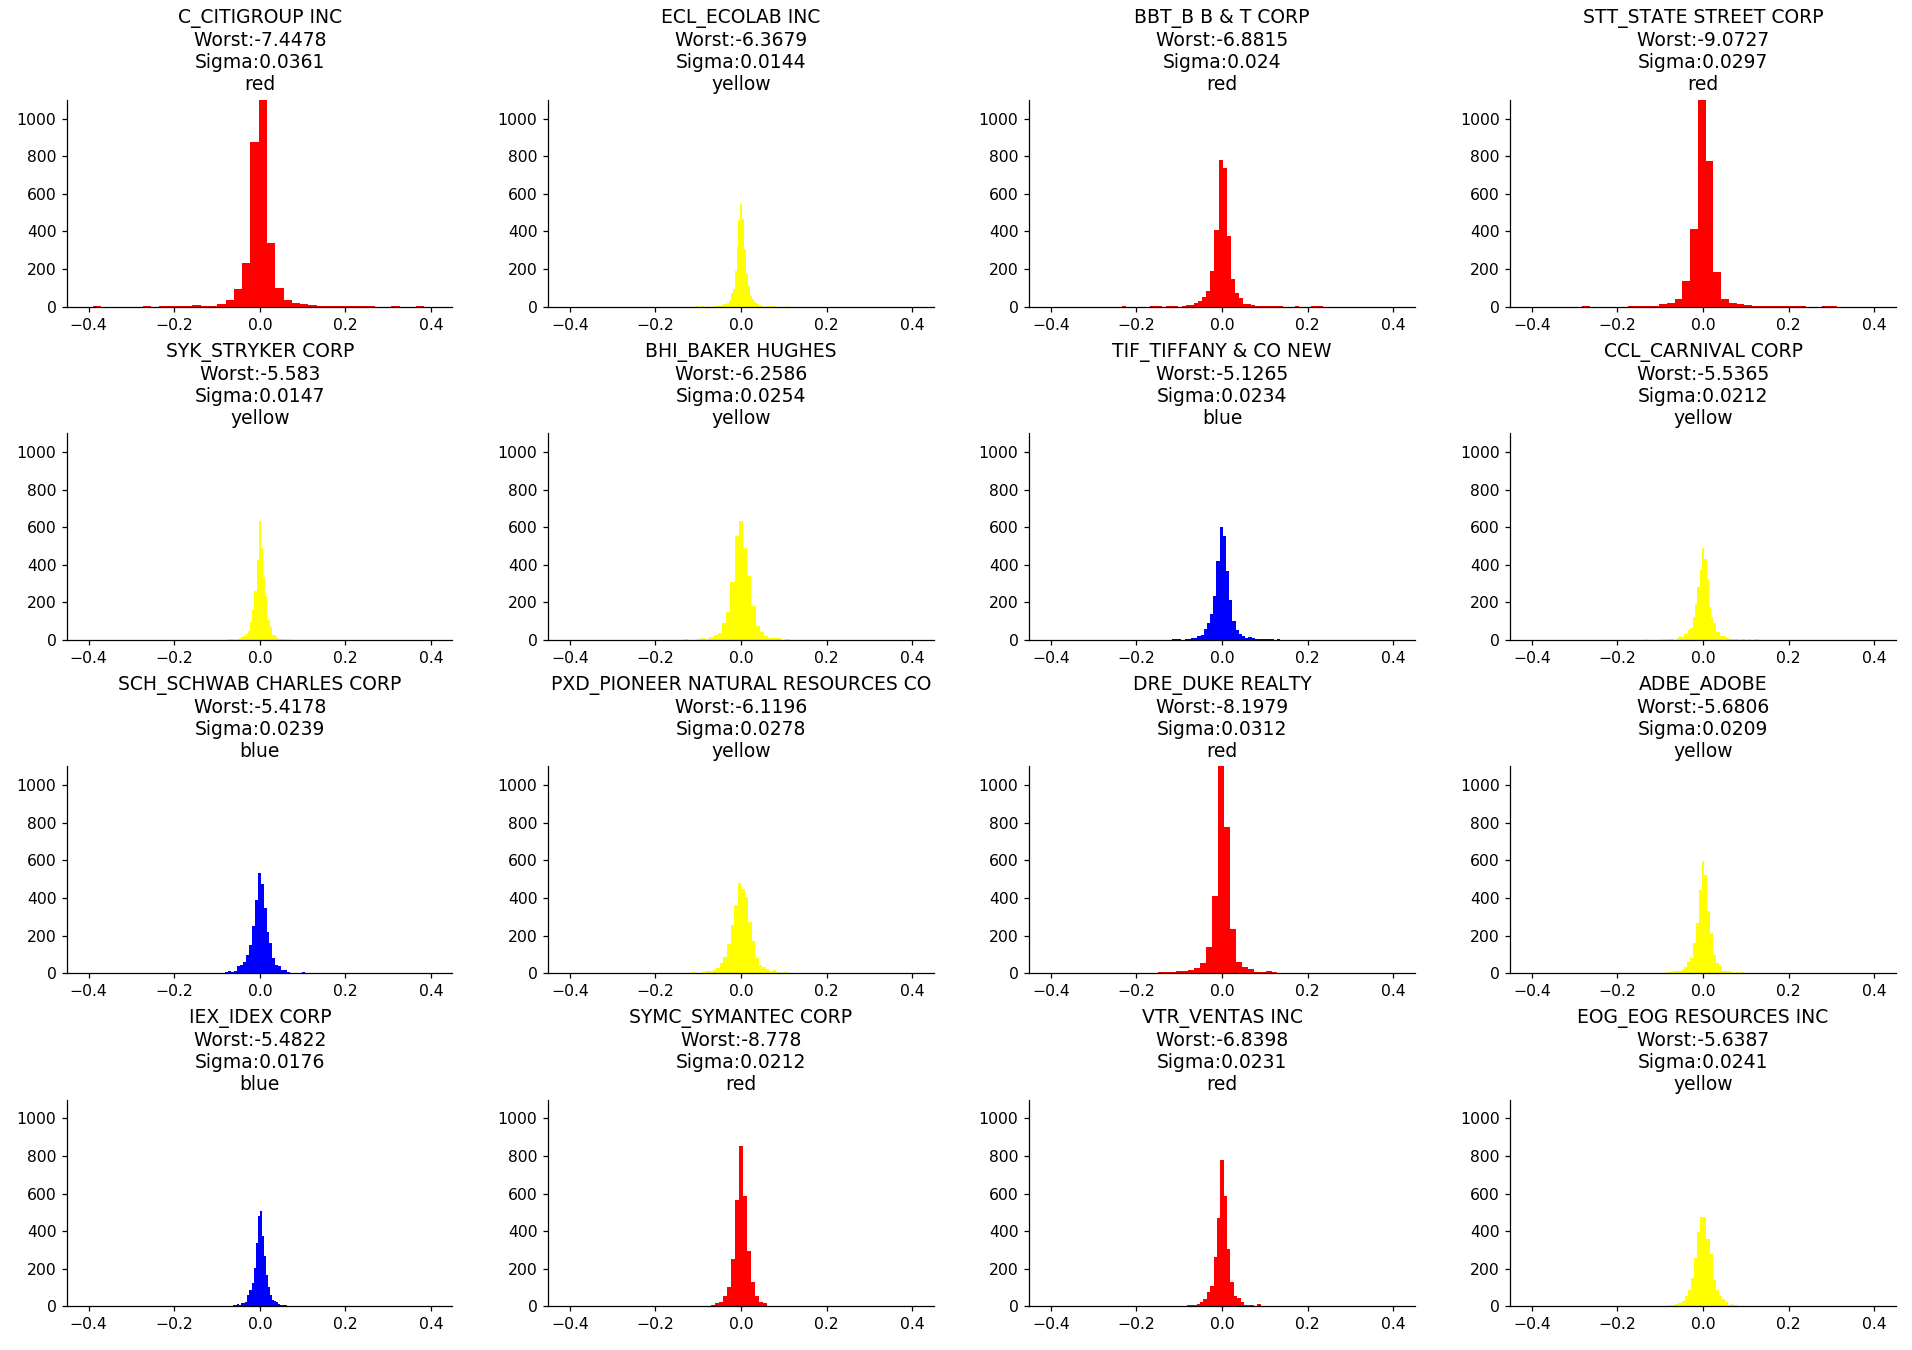









Batch 14


<IPython.core.display.Javascript object>


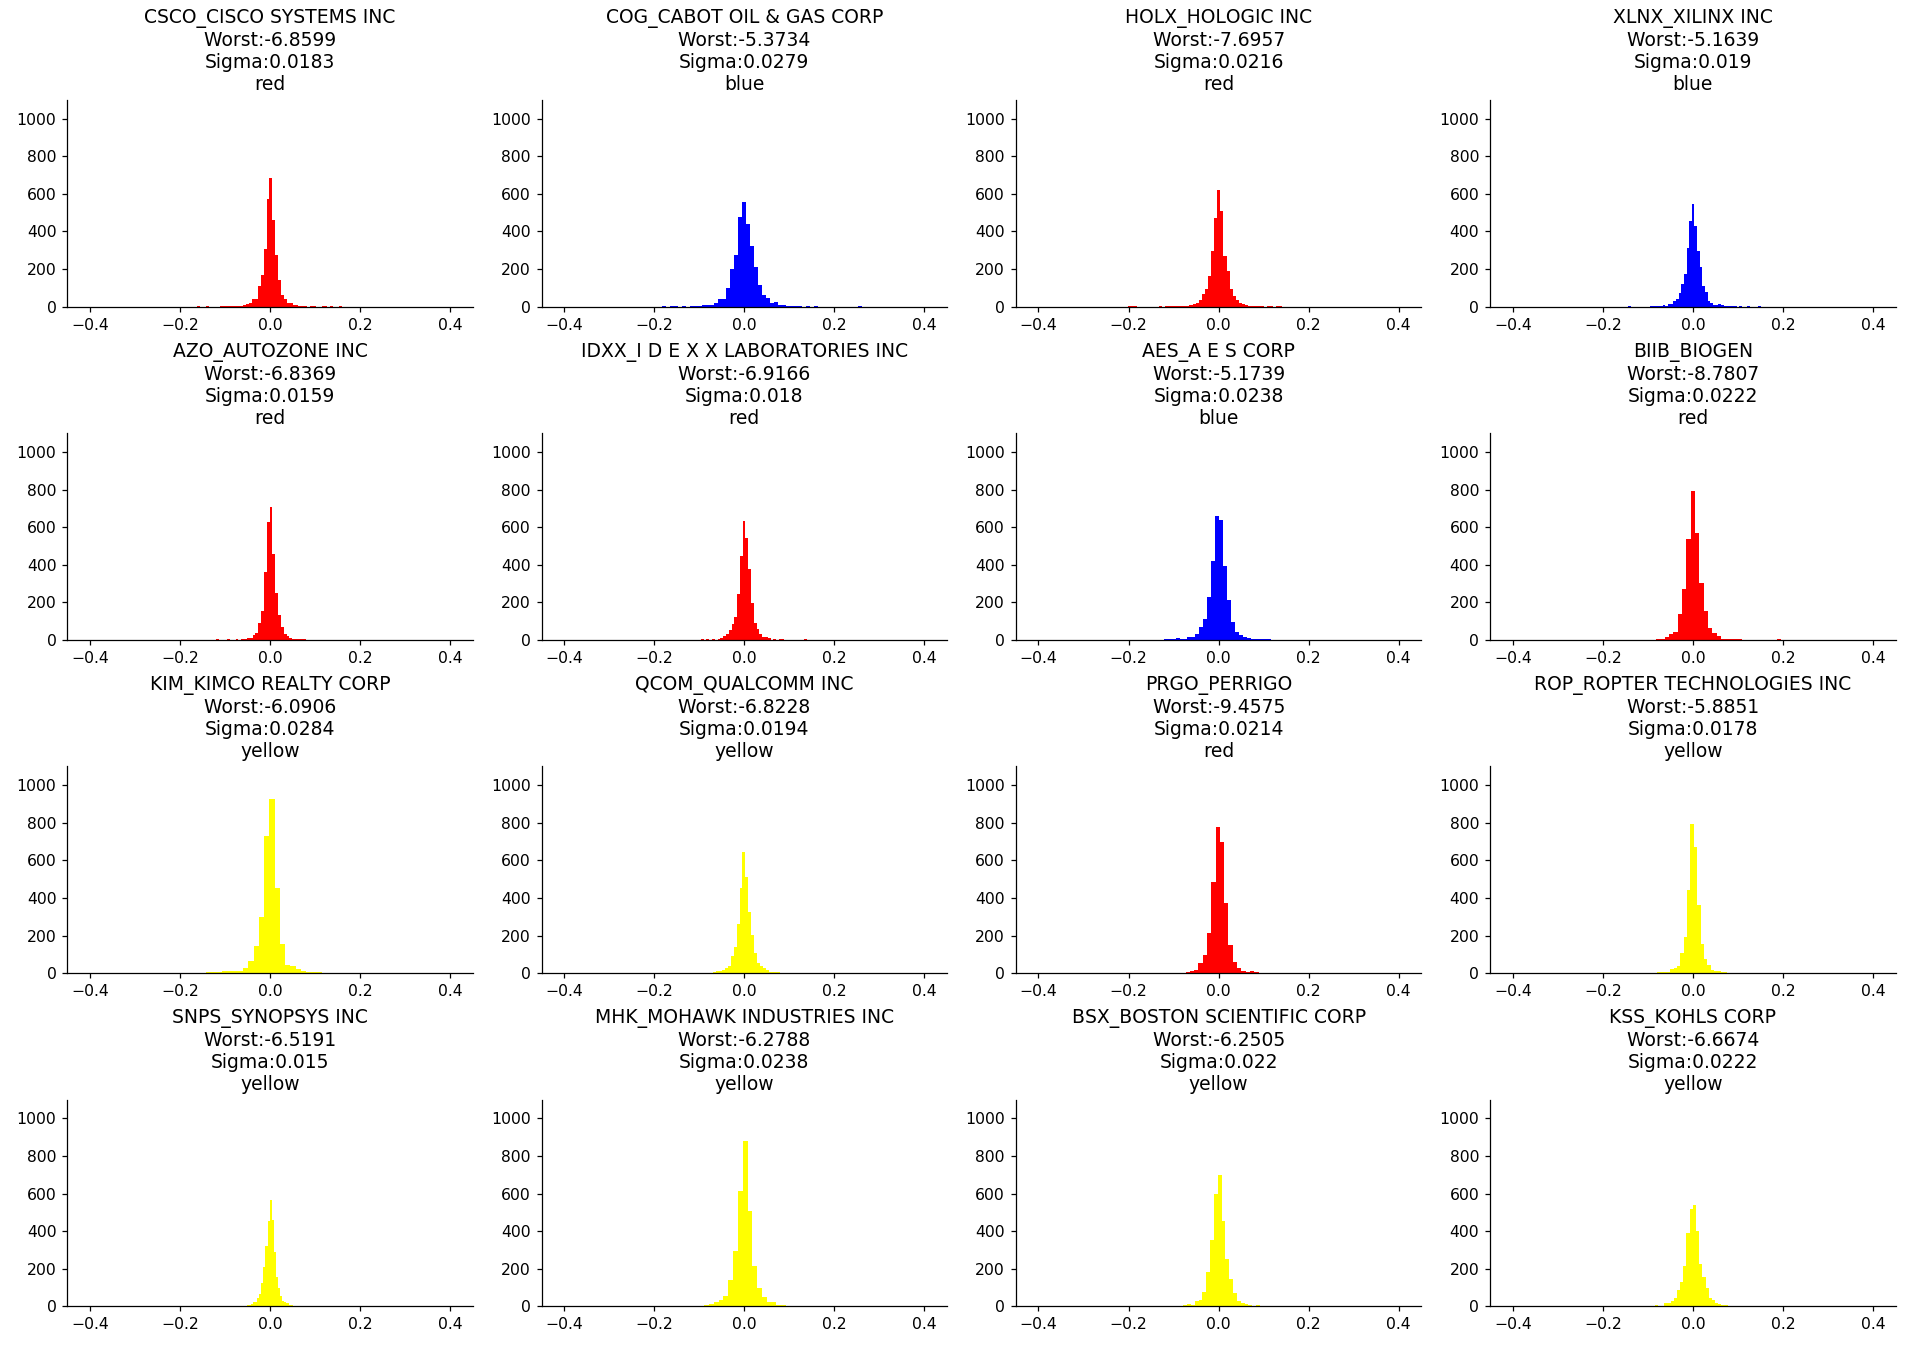









Batch 15


<IPython.core.display.Javascript object>


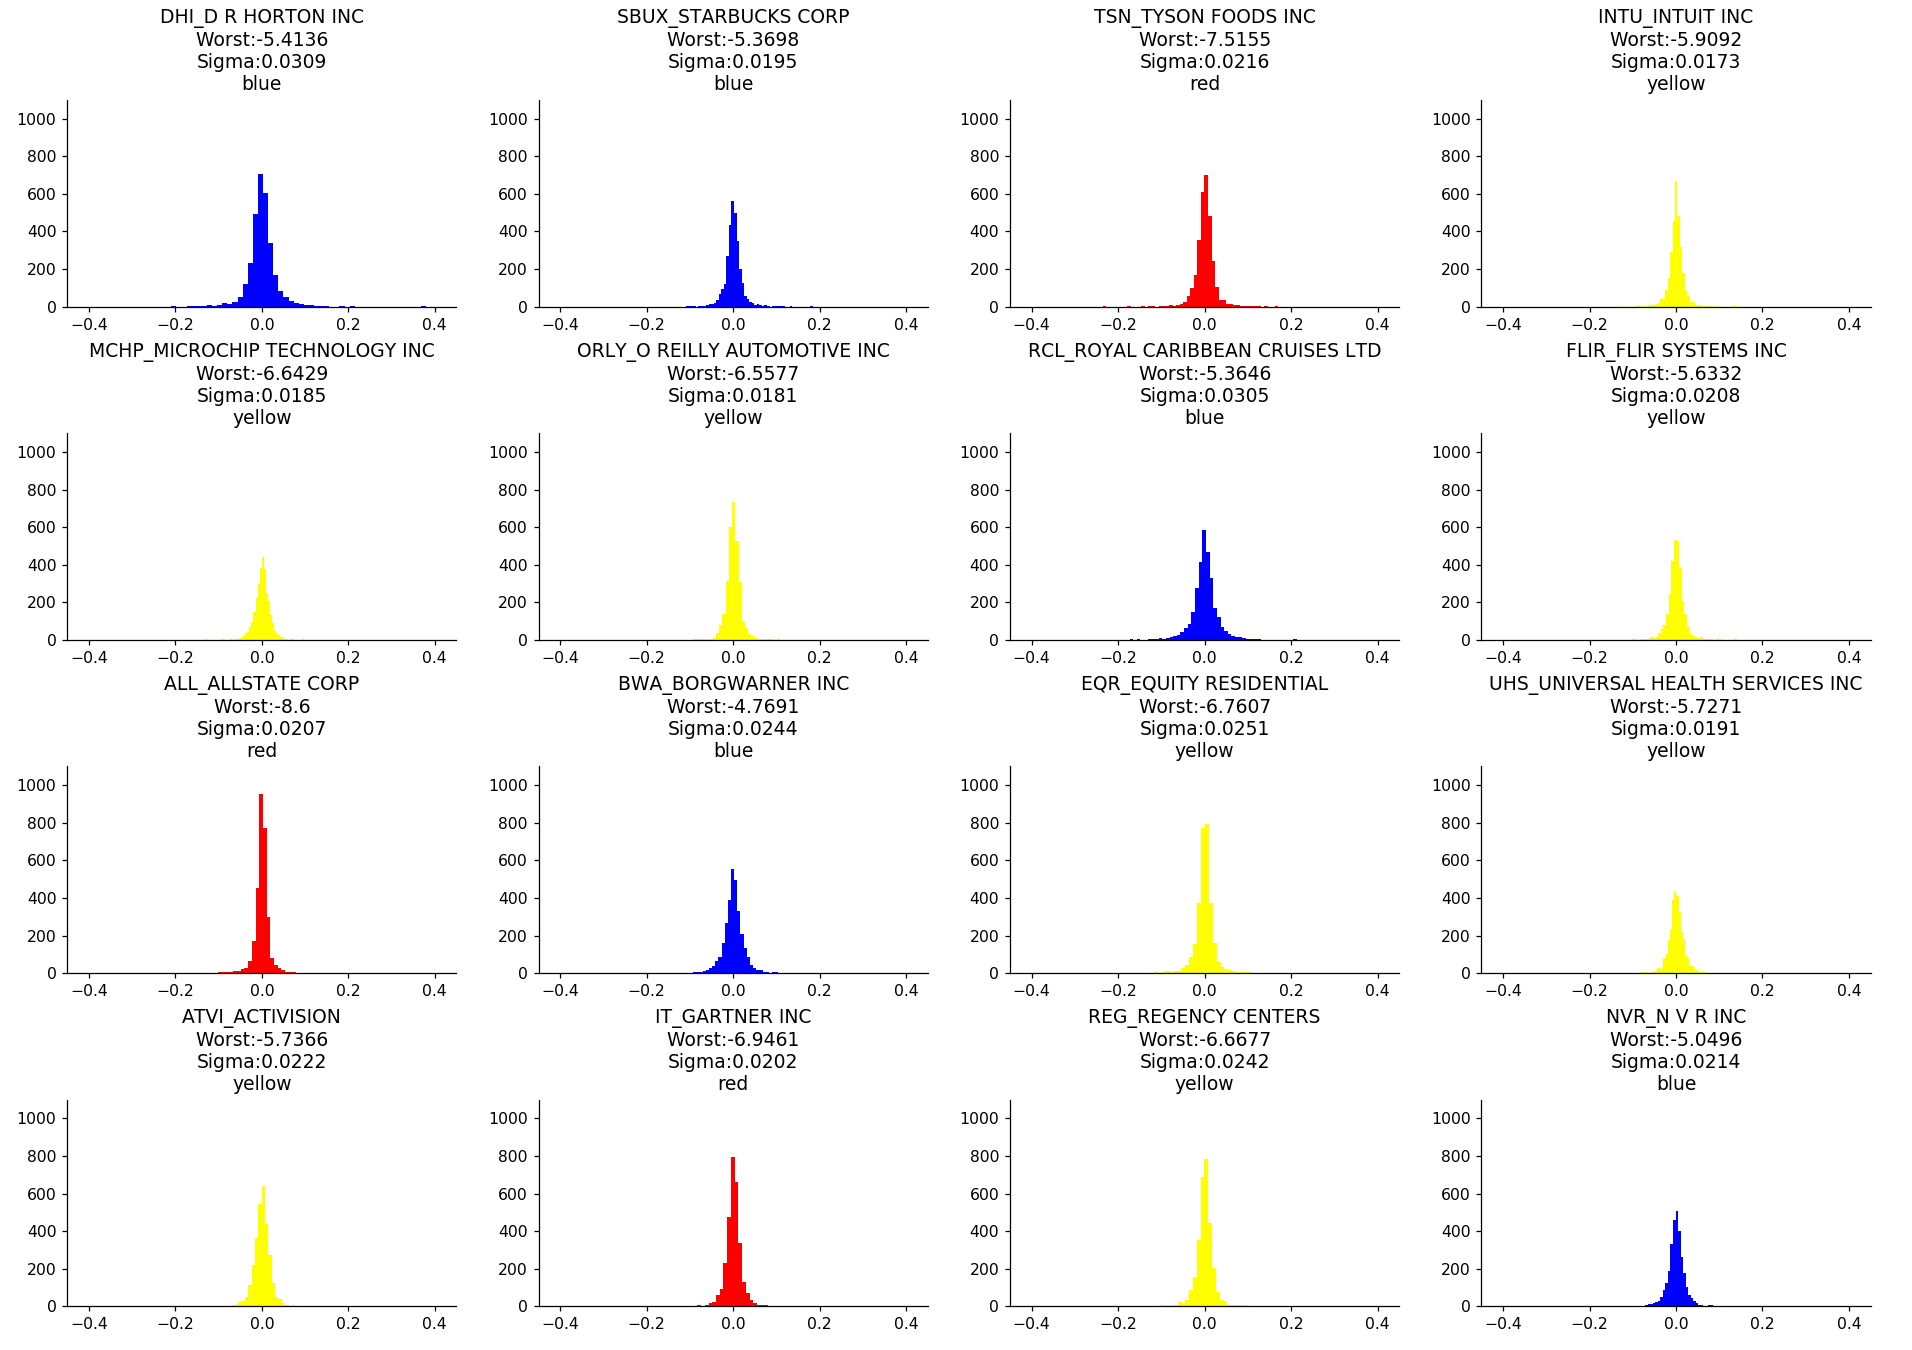









Batch 16


<IPython.core.display.Javascript object>


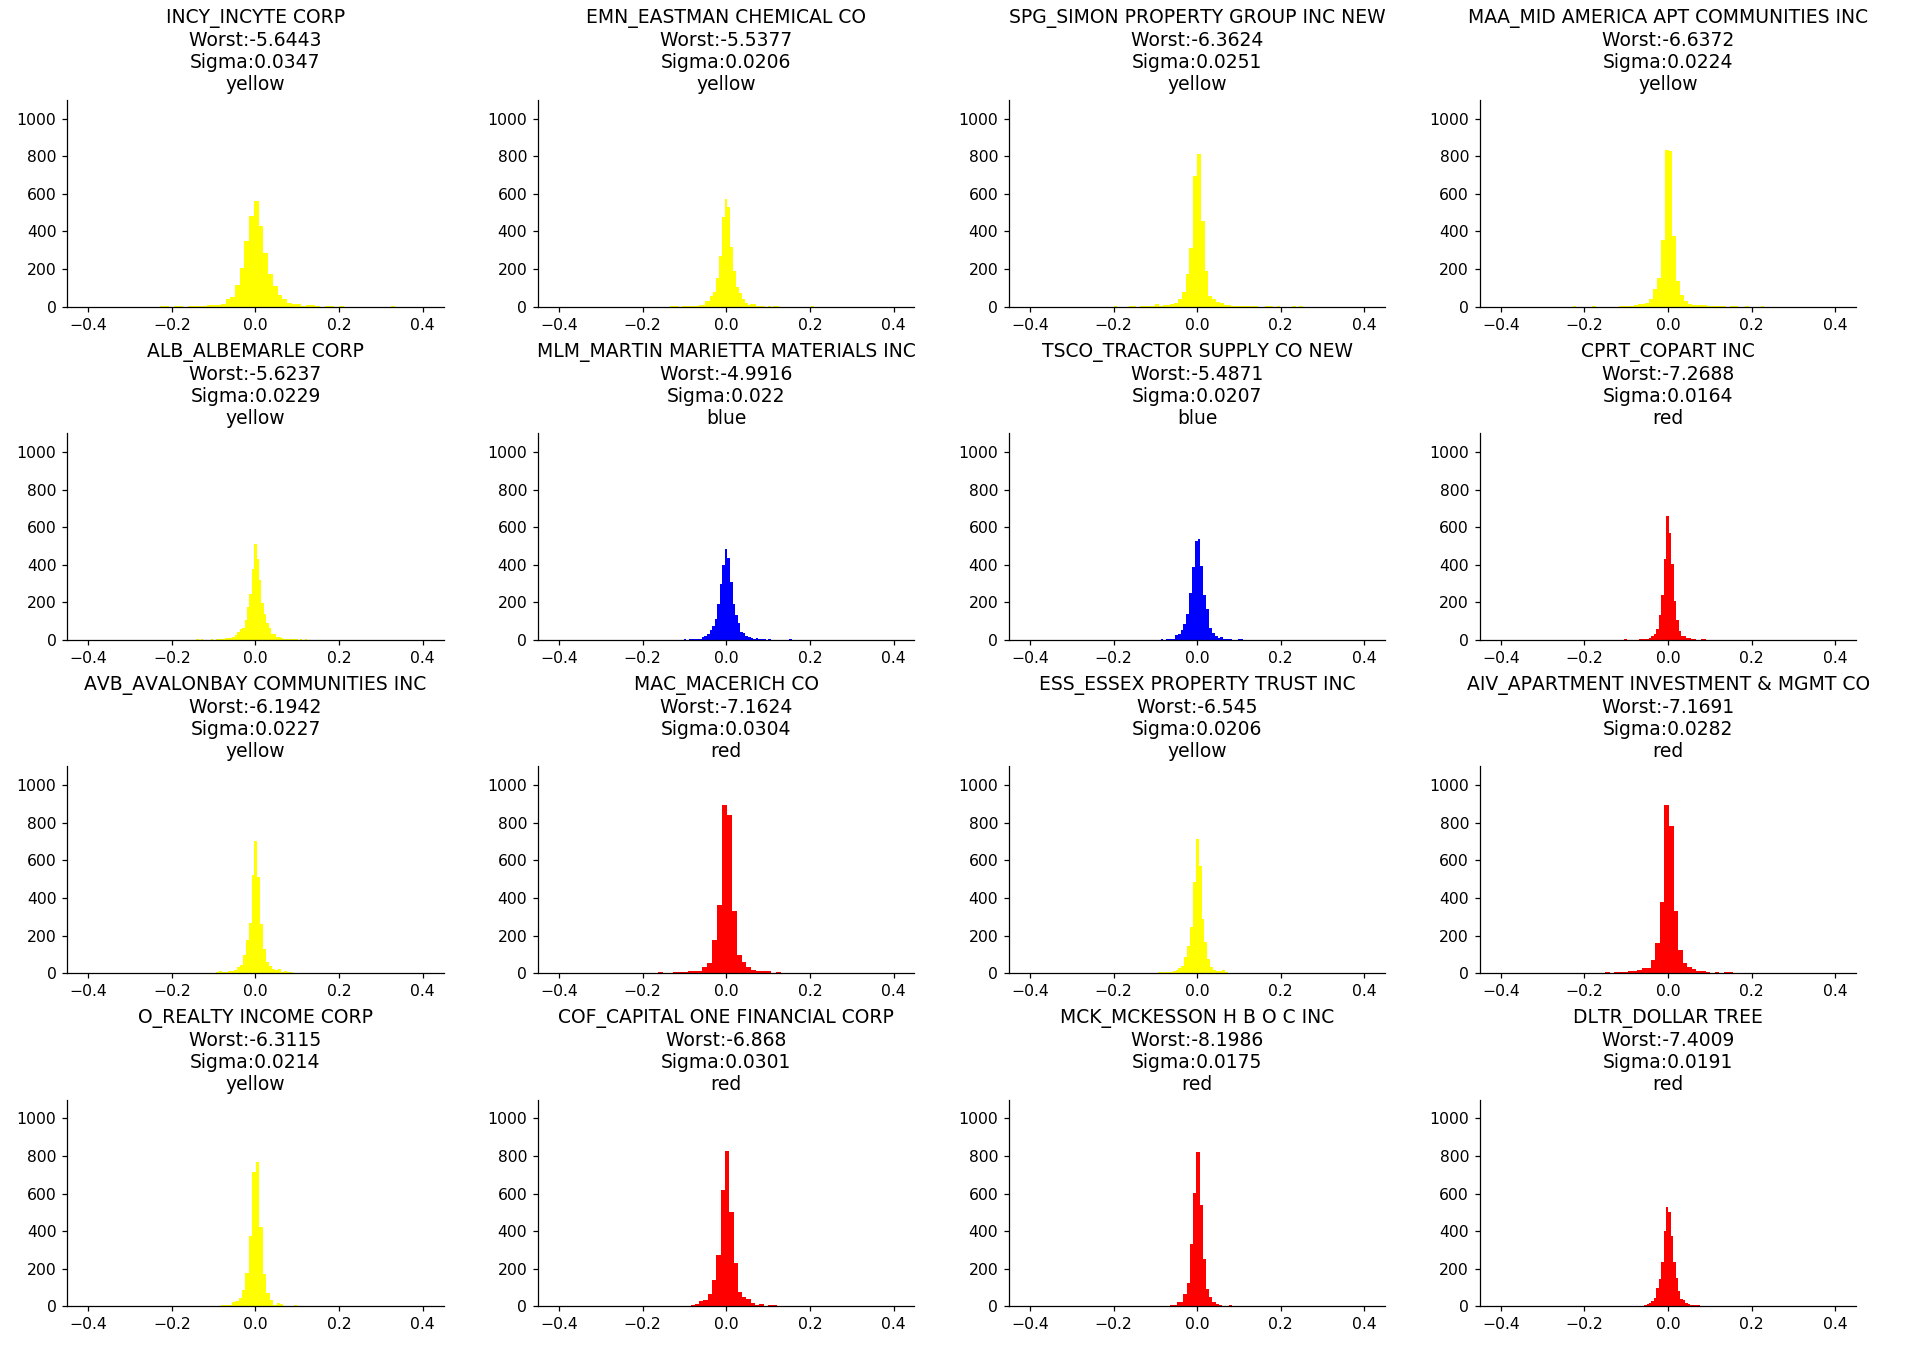









Batch 17


<IPython.core.display.Javascript object>


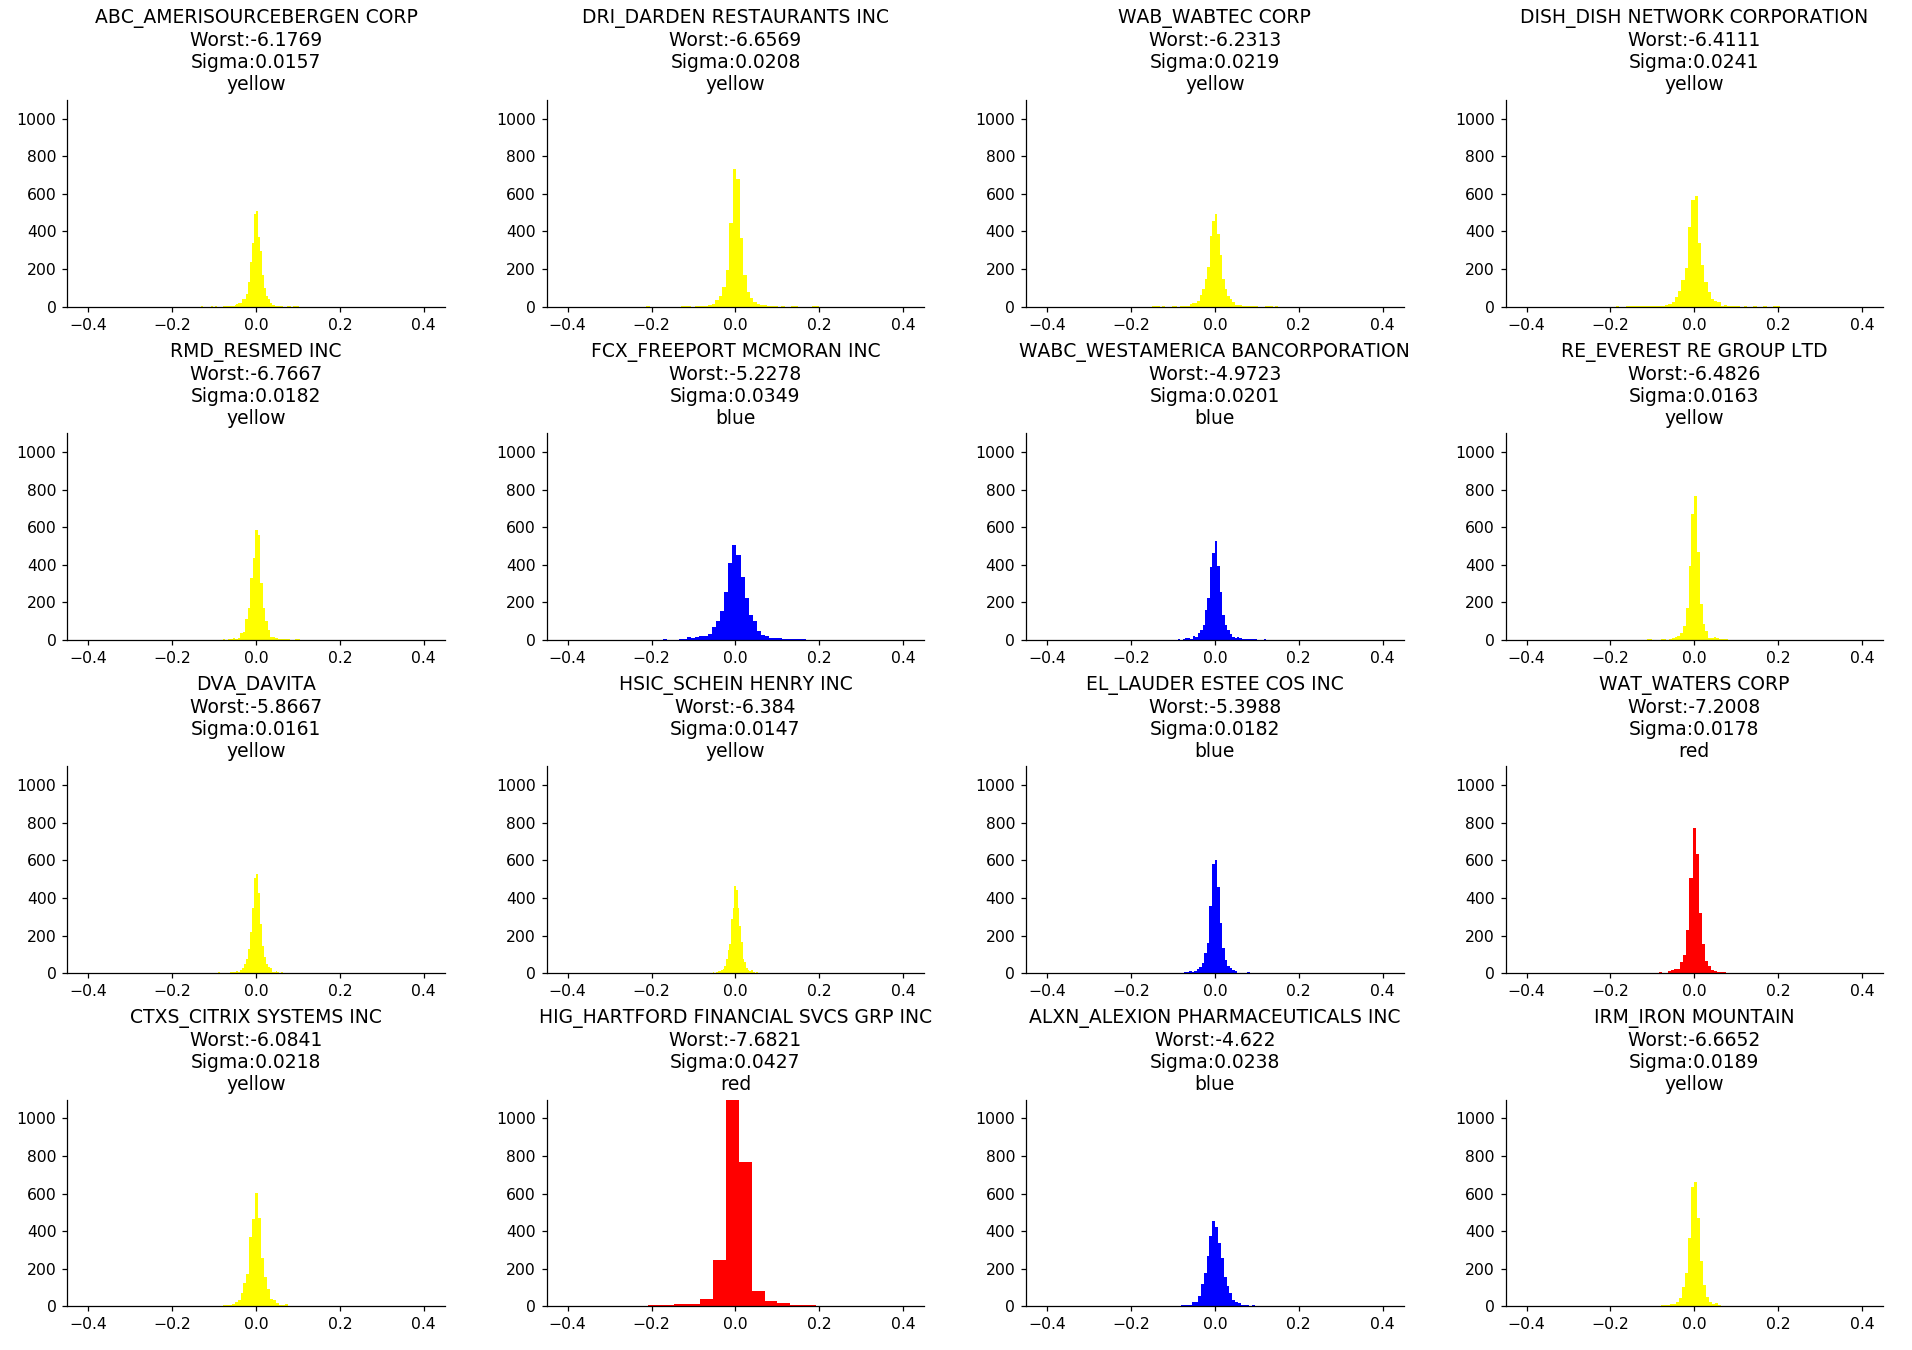









Batch 18


<IPython.core.display.Javascript object>


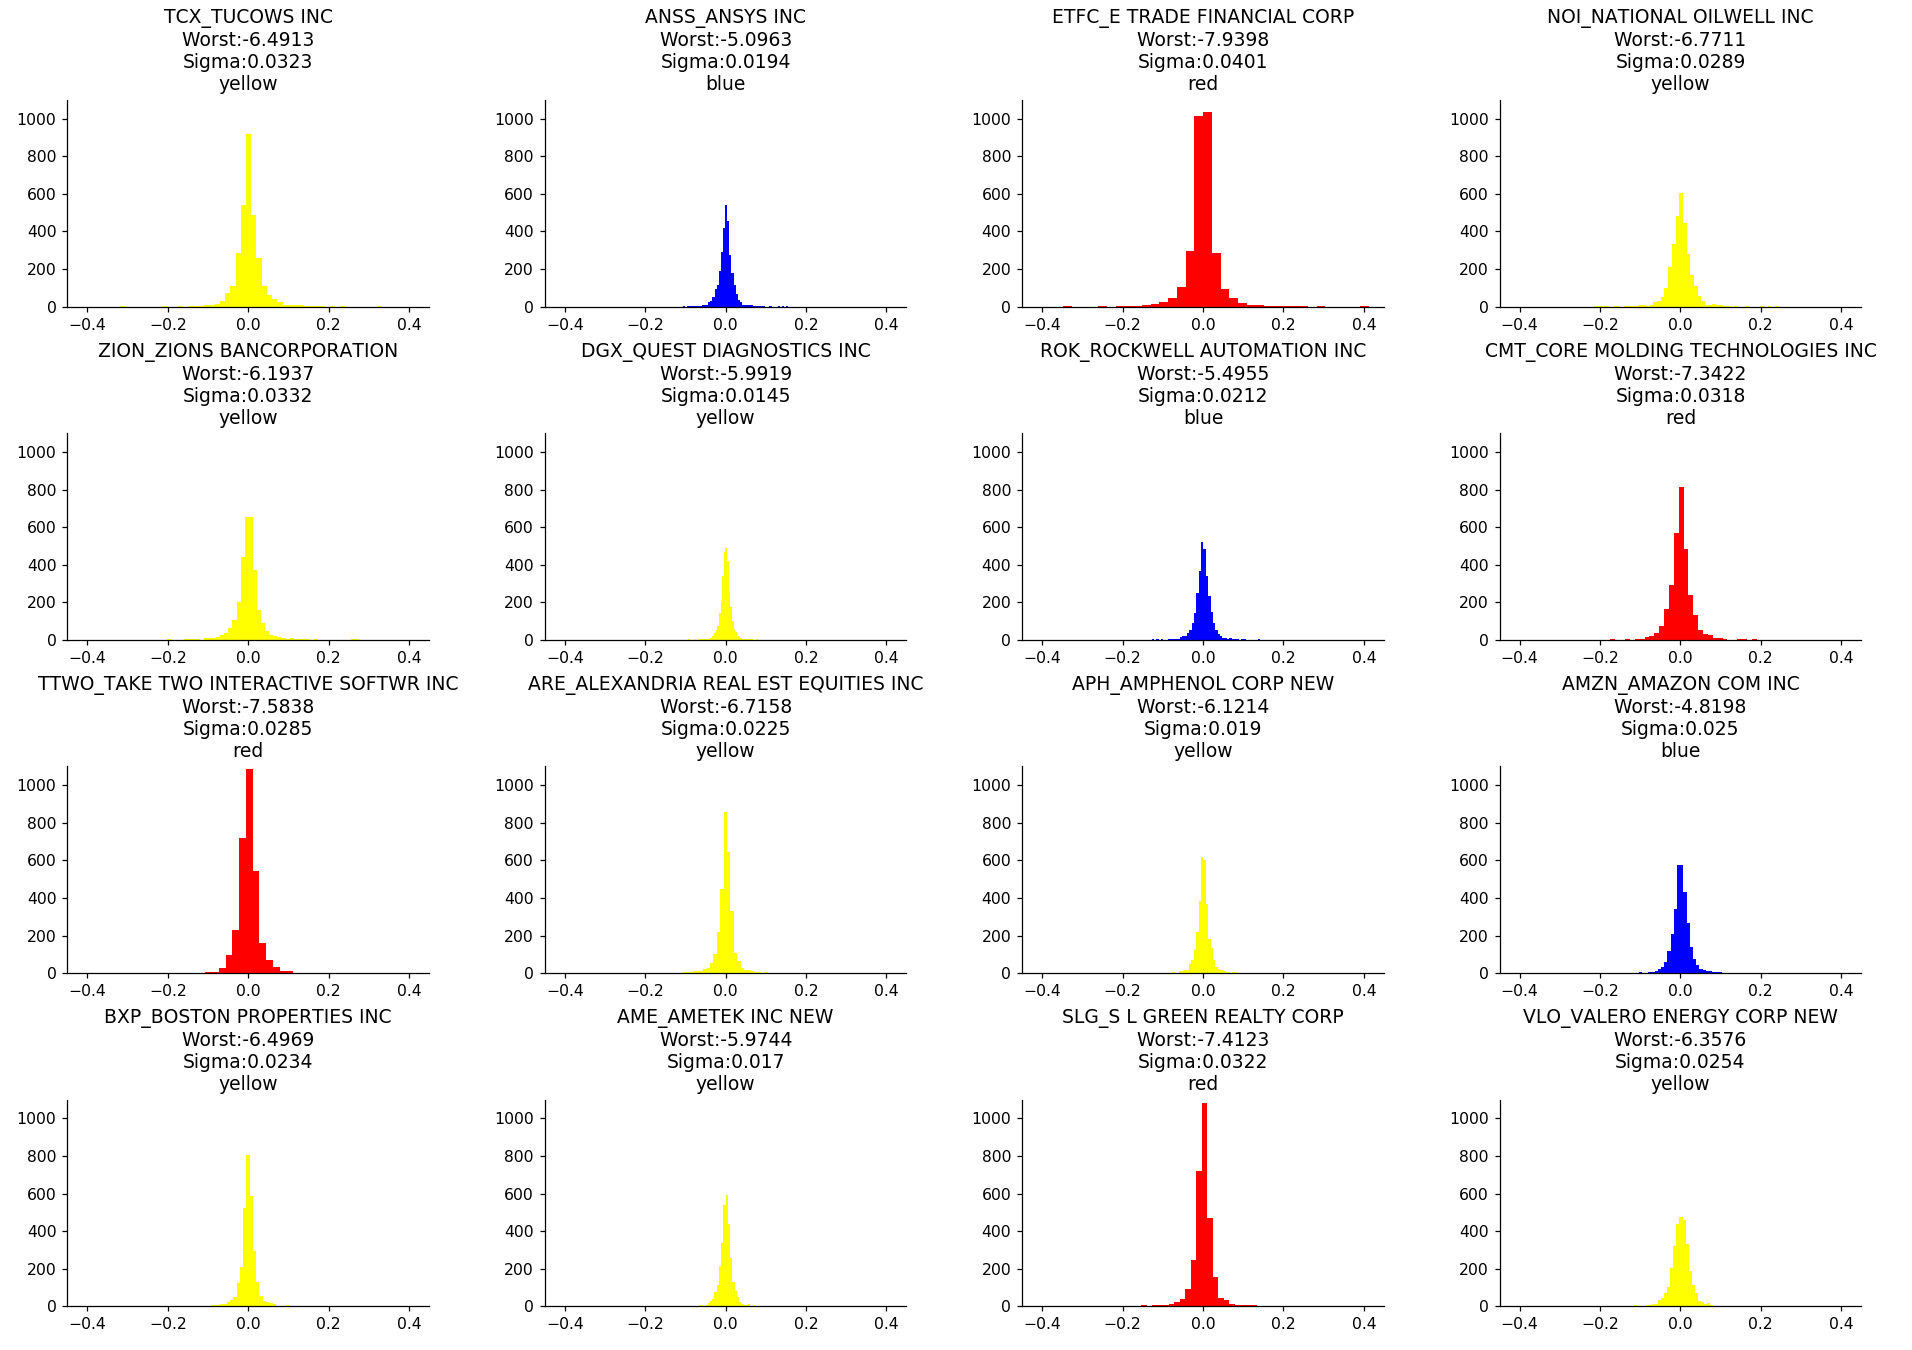









Batch 19


<IPython.core.display.Javascript object>


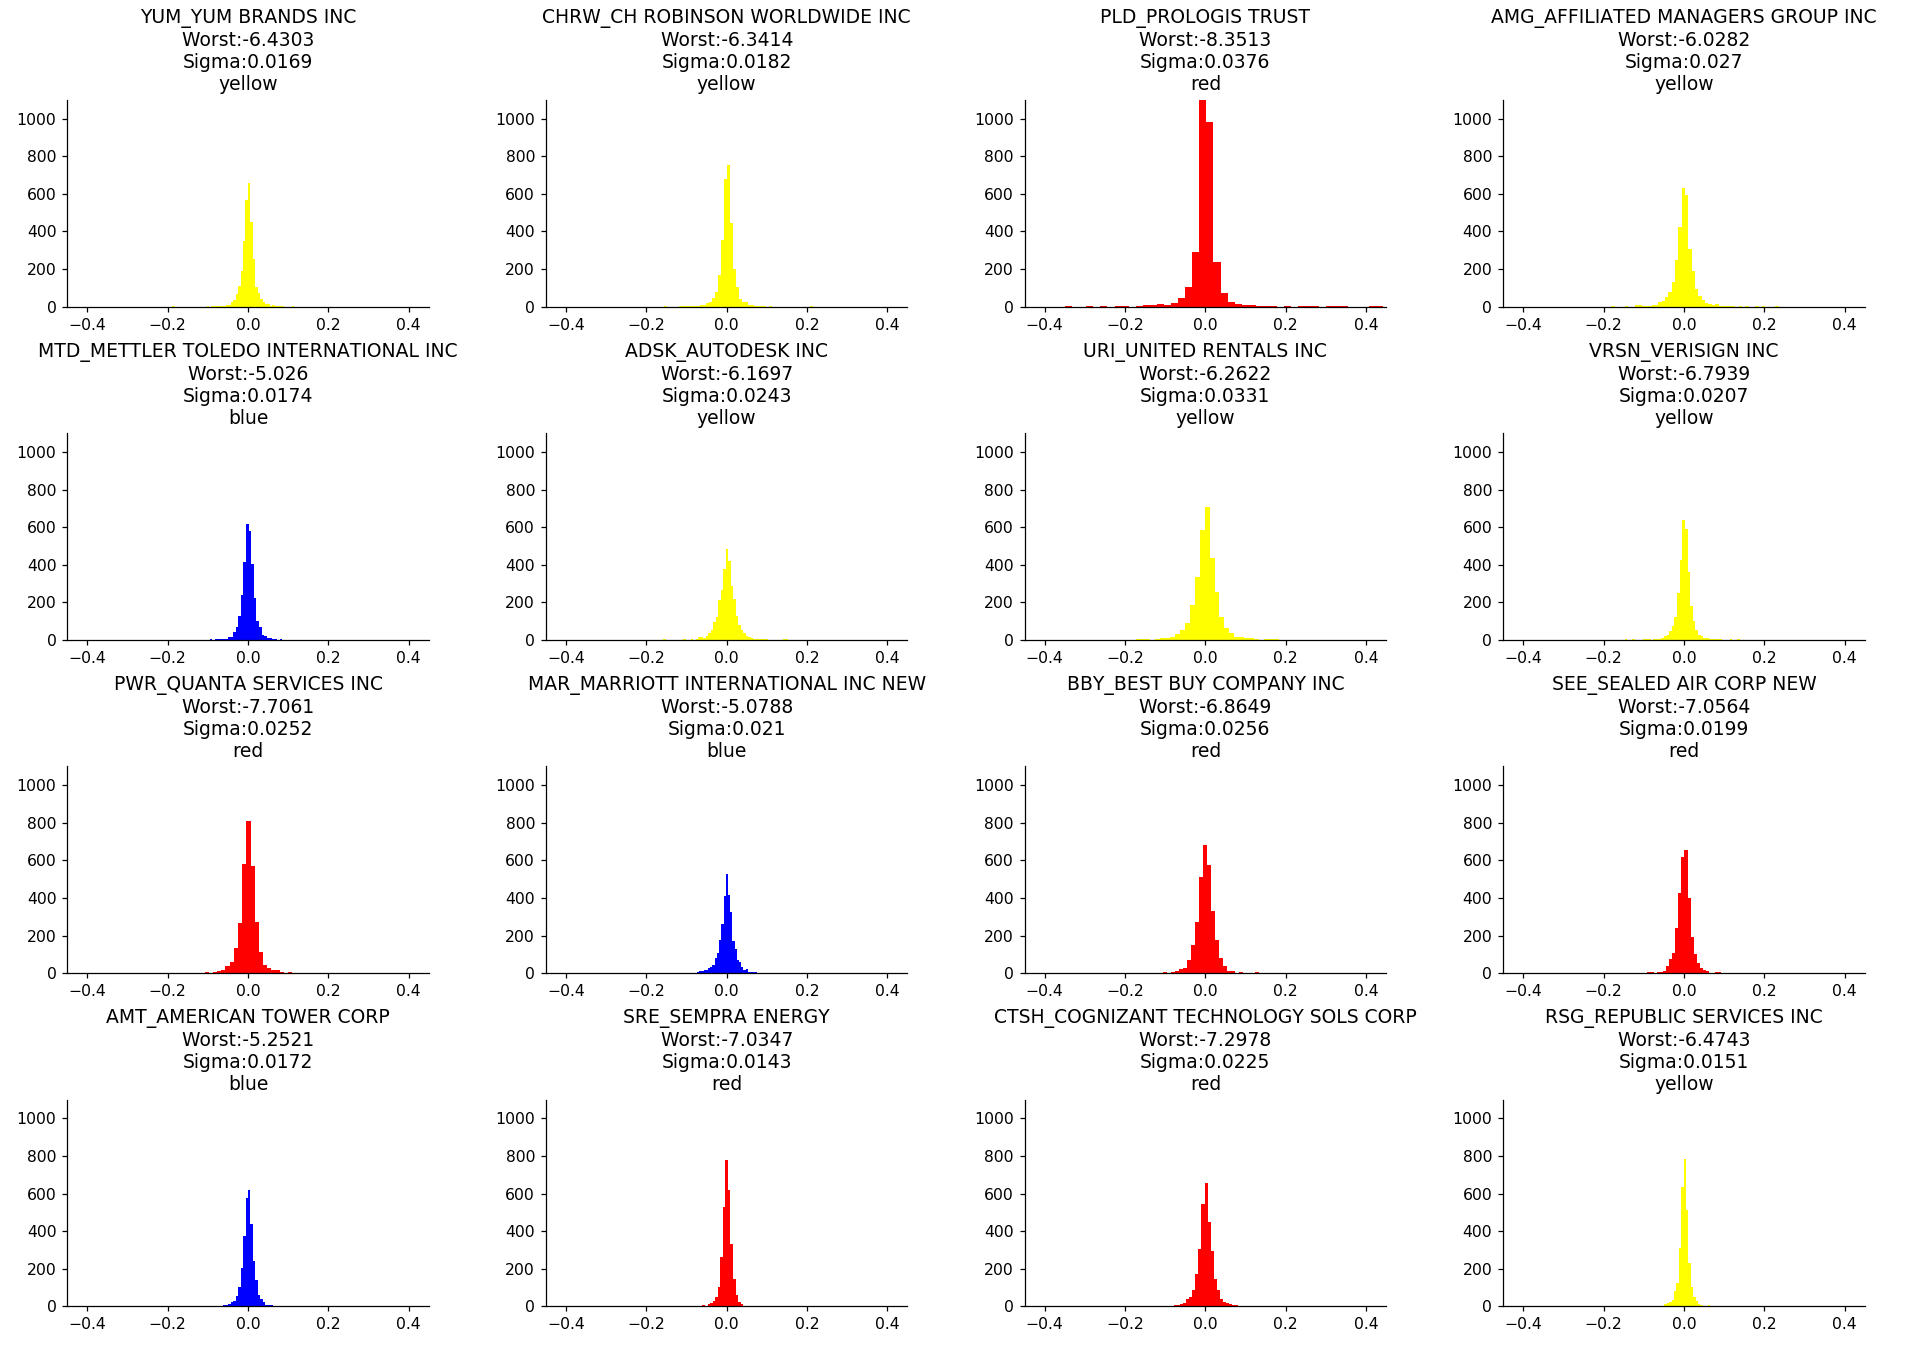









Batch 20


C:\PROGRA1\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


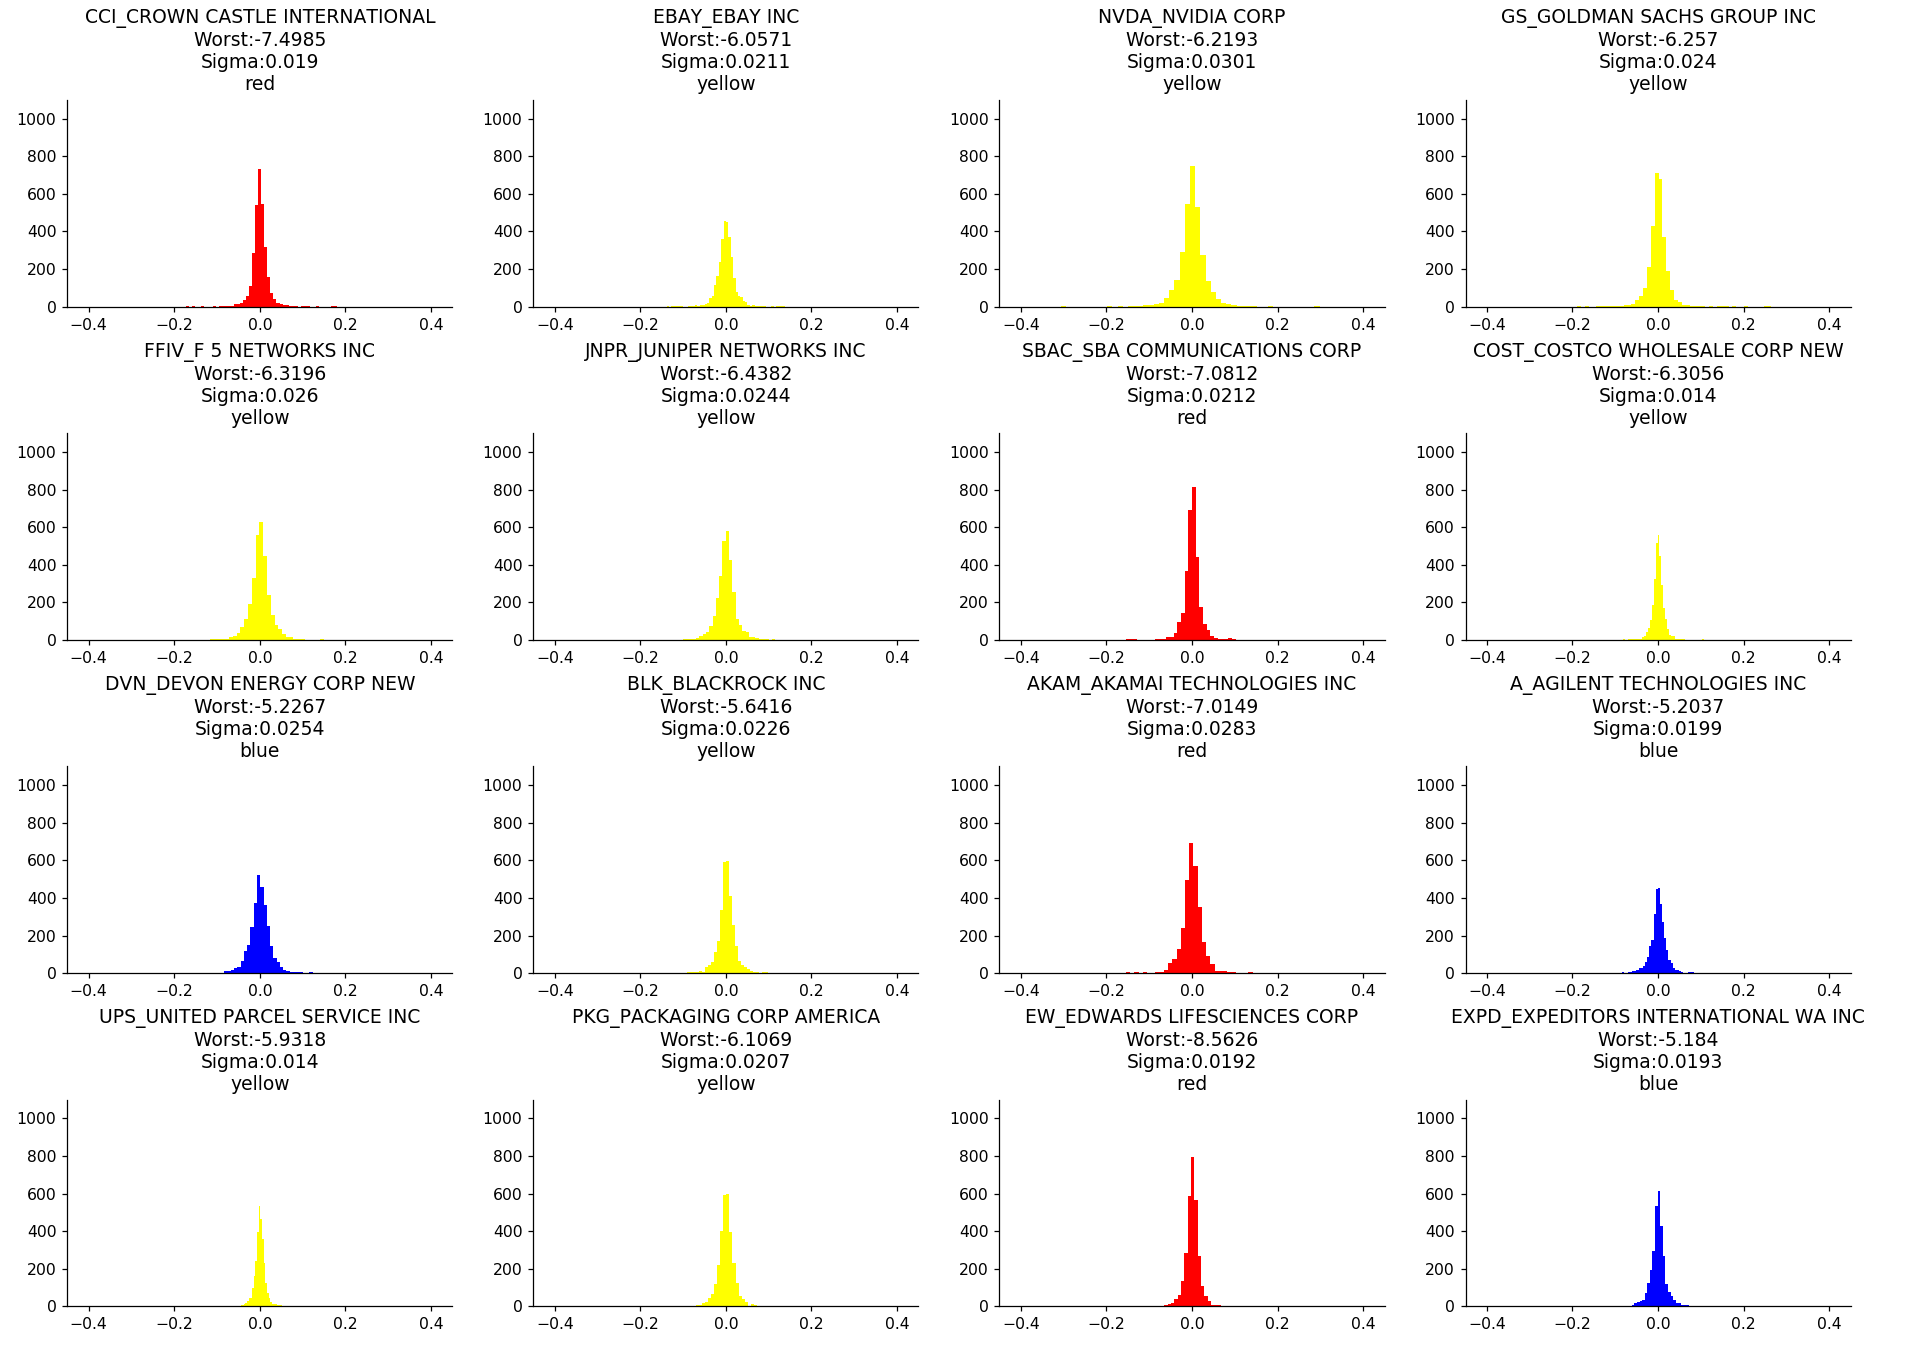









Batch 21


<IPython.core.display.Javascript object>


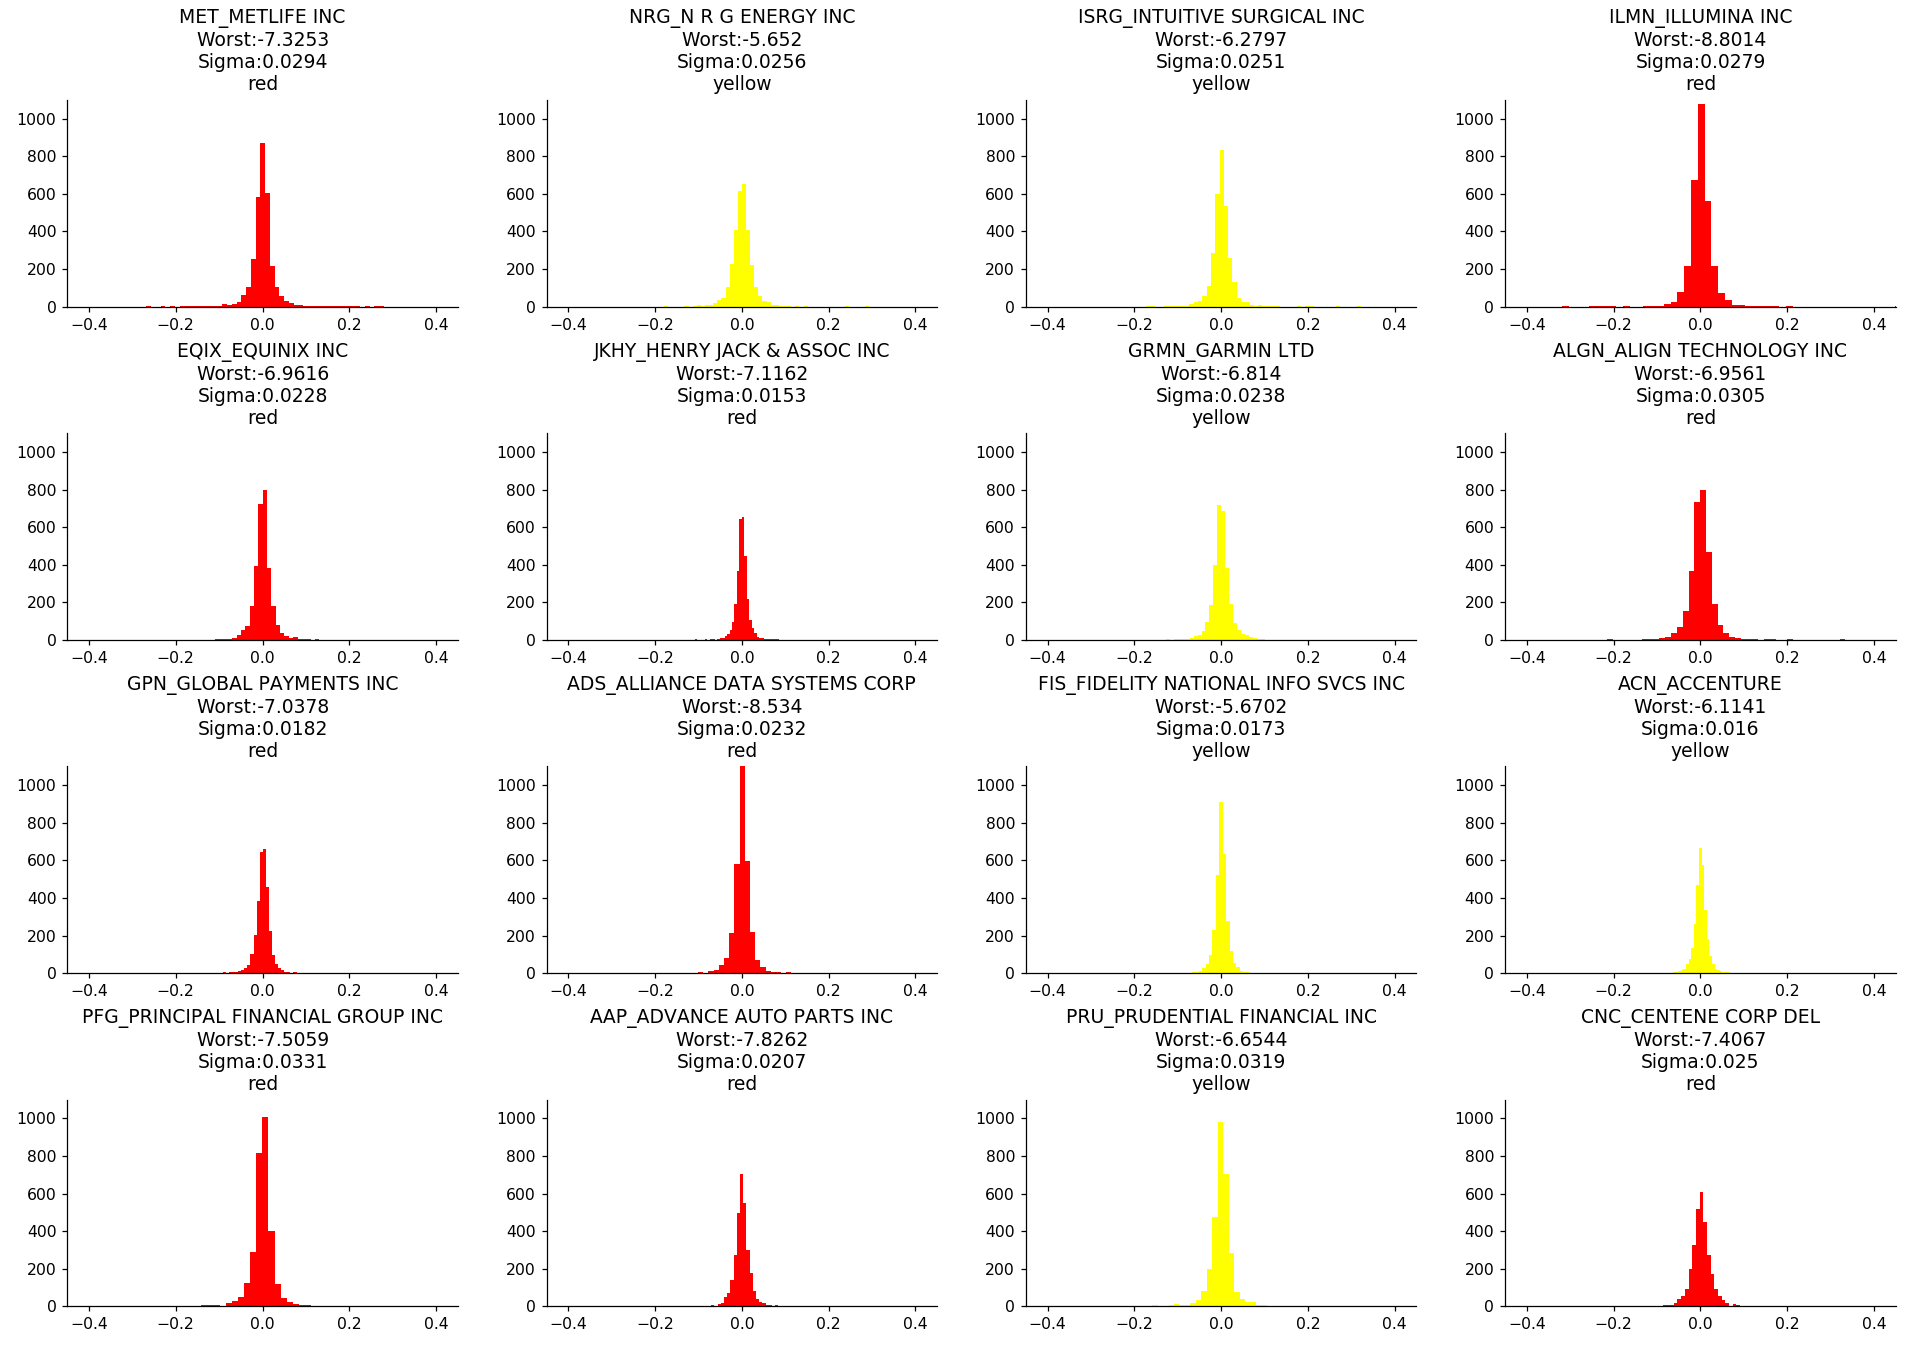









Batch 22


<IPython.core.display.Javascript object>


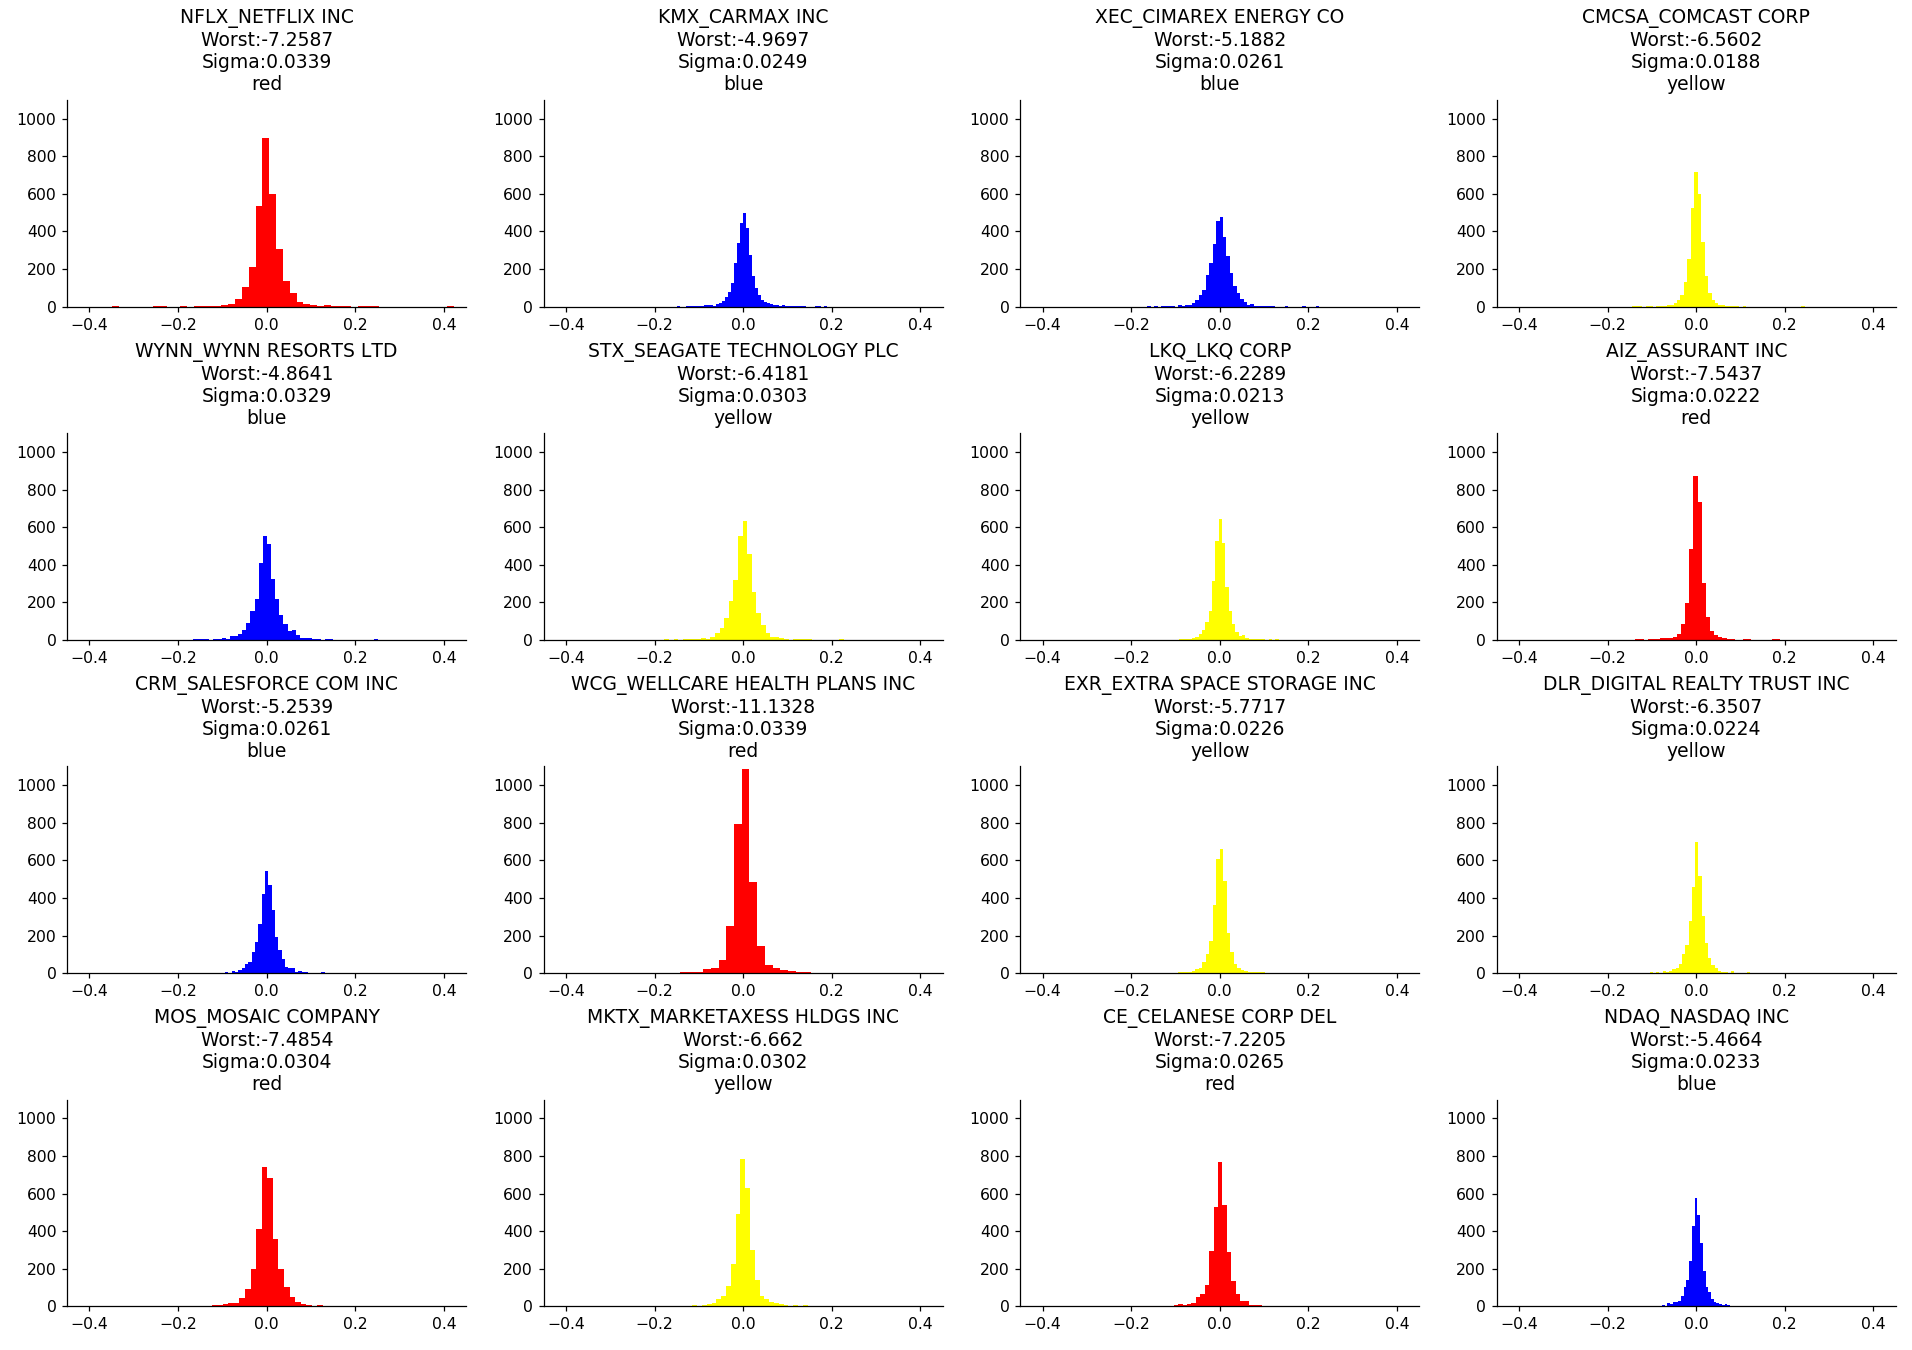









Batch 23


<IPython.core.display.Javascript object>


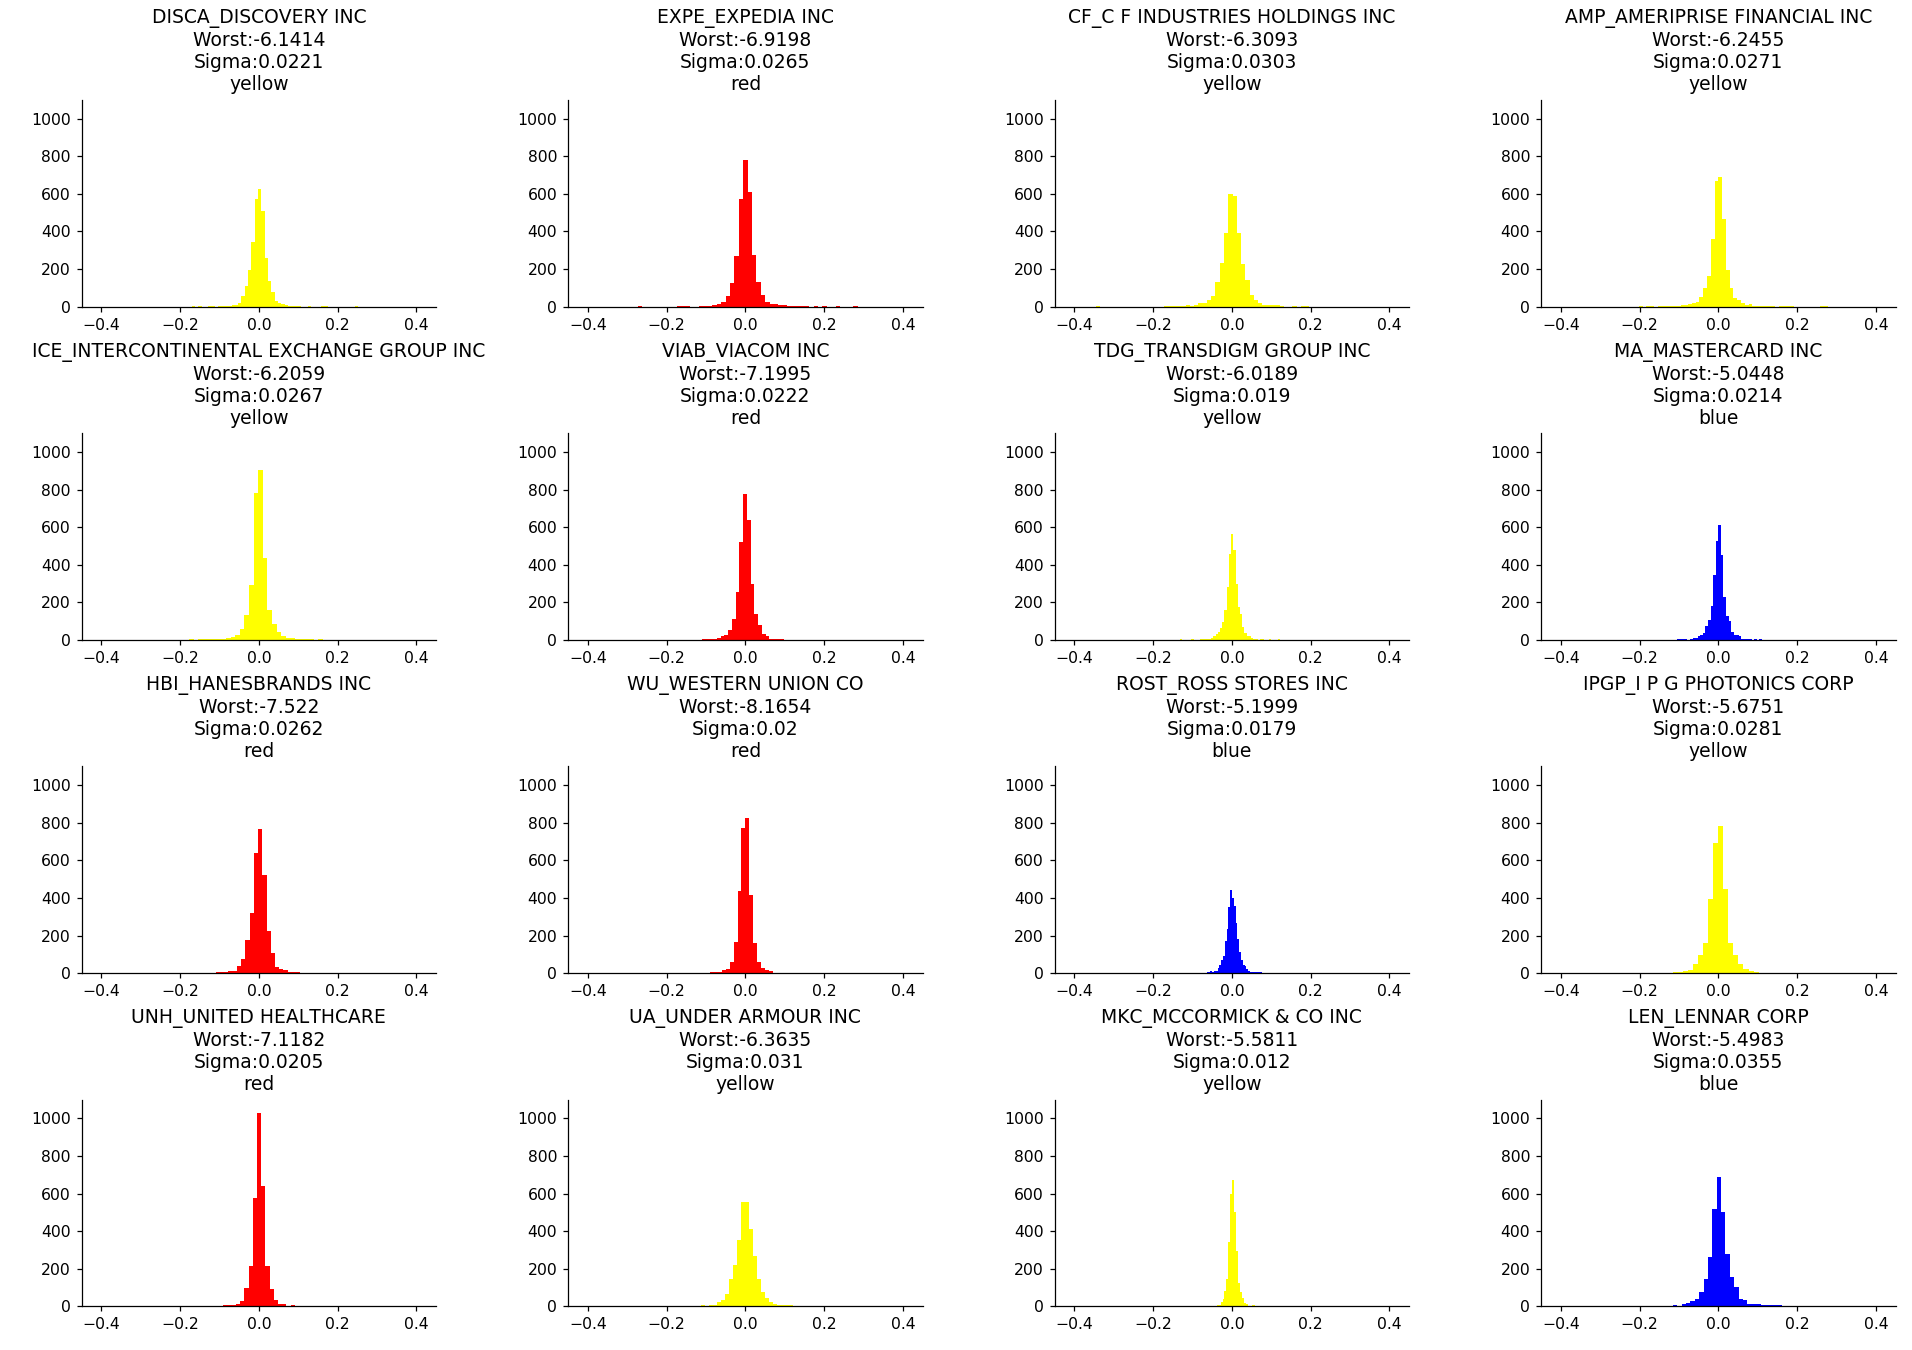

In [89]:
### matrix of subplots
n_cols = 4
n_rows = 4
n_plots = n_cols*n_rows
nloops = int(np.floor(388/n_plots))
temp_matrix = np.array(range(n_plots)).reshape(n_rows,n_cols)
divisor = np.sqrt(3020)
### worst z-scores
bottom = worst_z_scores.quantile(q=0.25)
middle = worst_z_scores.quantile(q=0.75)


for i in range(nloops):
    nn = len(df_returns.columns)
    lower = i*n_plots
    upper = (i+1)*n_plots
    #print(lower, upper)
    temp_list = df_returns.columns[lower:upper]
    print('\n\n\n\n\n\n\n\nBatch {}'.format(i))    
    
    fig, ax = plt.subplots(n_cols,n_rows,figsize=(17,12))
    for k in range(n_rows):
        for l in range(n_cols):
            ###--Generate Plot---## 
            ## indices
            temp_idx = temp_matrix[k,l]
            symbol = temp_list[temp_idx]
            ### worst return, it's z-score and sigma value
            worst_return = df_returns[symbol].sort_values()[0]
            ### z score of worst return
            worst_z = round(worst_z_scores[symbol], 4)
            sigma = round(df_returns[symbol].describe()['std'], 4)
            
            temp_color = None
            if worst_z <= bottom:
                temp_color = 'red'
            elif worst_z <= middle:
                temp_color = 'yellow'
            else:
                temp_color = 'blue'
                
            ##--Generate Plot--#        
            ax[k,l].hist(df_returns[symbol], bins=50,color=temp_color)
            ax[k,l].set_title('{}\nWorst:{}\nSigma:{}\n{}'.format(symbol, worst_z, sigma, temp_color))
            ax[k,l].set_xlim([-0.45, 0.45])
            ax[k,l].set_ylim([0,1100])
            ax[k,l].spines['top'].set_visible(False)
            ax[k,l].spines['right'].set_visible(False)
                        
    fig.subplots_adjust(hspace=0.7)
    plt.tight_layout()
    plt.show()
    

### leftovers









Batch 0


C:\PROGRA1\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


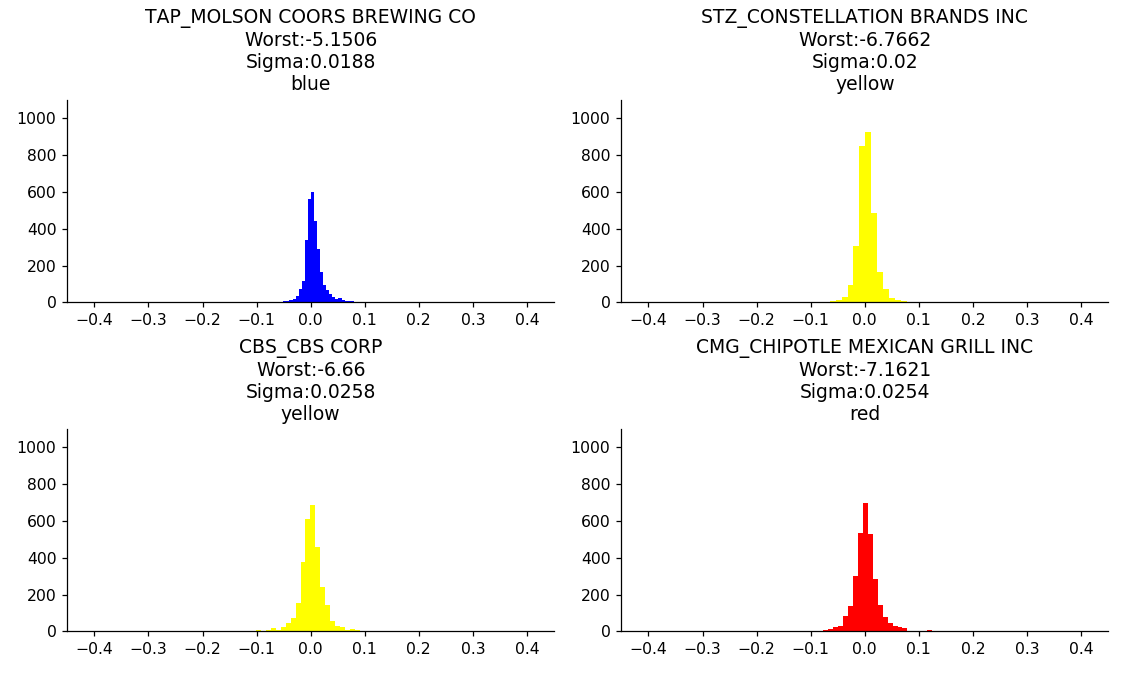

In [90]:
### matrix of subplots
n_cols = 2
n_rows = 2
n_plots = n_cols*n_rows
nloops = 1
temp_matrix = np.array(range(n_plots)).reshape(n_rows,n_cols)
divisor = np.sqrt(3020)
### worst z-scores
bottom = worst_z_scores.quantile(q=0.25)
middle = worst_z_scores.quantile(q=0.75)


for i in range(nloops):
    nn = len(df_returns.columns)
    #print(lower, upper)
    temp_list = df_returns.columns[-n_plots:]
    print('\n\n\n\n\n\n\n\nBatch {}'.format(i))
    
    
    fig, ax = plt.subplots(n_cols,n_rows,figsize=(10,6))
    for k in range(n_rows):
        for l in range(n_cols):
            ###--Generate Plot---## 
            ## indices
            temp_idx = temp_matrix[k,l]
            symbol = temp_list[temp_idx]
            ### worst return, it's z-score and sigma value
            worst_return = df_returns[symbol].sort_values()[0]
            ### z score of worst return
            worst_z = round(worst_z_scores[symbol], 4)
            sigma = round(df_returns[symbol].describe()['std'], 4)
            
            temp_color = None
            if worst_z <= bottom:
                temp_color = 'red'
            elif worst_z <= middle:
                temp_color = 'yellow'
            else:
                temp_color = 'blue'
                
            ##--Generate Plot--#        
            ax[k,l].hist(df_returns[symbol], bins=50,color=temp_color)
            ax[k,l].set_title('{}\nWorst:{}\nSigma:{}\n{}'.format(symbol, worst_z, sigma, temp_color))
            ax[k,l].set_xlim([-0.45, 0.45])
            ax[k,l].set_ylim([0,1100])
            ax[k,l].spines['top'].set_visible(False)
            ax[k,l].spines['right'].set_visible(False)

    fig.subplots_adjust(hspace=0.7)
    plt.tight_layout()
    plt.show()   

### remember: we can add as many dimensions to the plot as pices of text that we'd like to add